## Sommaire

* [Importation des librairies](#import)


* [1.Chargement des bases de données](#chargement)


* [2. Nettoyage des données](#nettoyage)


* [3. Jointure des 8 dataframes](#jointure)


* [4. Nettoyage du dataframe principal](#nettoyage2)


* [5. Clustering par segmentation hiérarchique ascendante](#clustering)


* [6. ACP (Analyse en composantes principales)](#ACP)


* [7. Analyse des pays du cluster 5](#analyse)


* [8. Analyse des pays des nouveaux groupes 2, 3, 4 et 5](#analyse2)


* [9. Tests statistiques](#test)

    -[a. Tests d'adéquation à la loi normale](#test1)

    -[b. Tests statistiques des clusters dans la variable 'disponibilité alimentaire(Kcal)'](#test2)

## Importation des librairies <a class='anchor' id='import'></a>

In [1]:
# install.packages("plyr")
# install.packages("dplyr")
# install.packages("reshape2")
# install.packages("tidyr")
# install.packages("openxlsx")
# install.packages("openxls")
# install.packages(c("FactoMineR", "factoextra"))
# install.packages("corrplot")
# install.packages("fpc")
# install.packages("tidyverse") 
# install.packages("scales")
# install.packages("EnvStats")
# install.packages("nortest")
# install.packages("cowplot")

In [2]:
library(plyr)
library(dplyr)
library(reshape2)
library(tidyr)
library(openxlsx)
library(FactoMineR)
library(factoextra)
library(cluster)
library(corrplot)
library(fpc)
library(scales)
library(tidyverse)
library(EnvStats)
library(nortest)
library(cowplot)

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:plyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'reshape2' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"
Attaching package: 'tidyr'

The following object is masked from 'package:reshape2':

    smiths

Warning message:
"package 'openxlsx' was built under R version 3.6.3"Warning message:
"package 'FactoMineR' was built under R version 3.6.3"Warning message:
"package 'factoextra' was built under R version 3.6.3"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Welcome! Want to learn more? See two factoextra-relat

## 1. Chargement des bases de données <a class='anchor' id='chargement'></a>

#### Population

In [3]:
pop <- read.table("data/Population_F_Toutes_les_Données_(Normalisé).csv", sep=',', header=TRUE)
head(pop)

Code.zone,Zone,Code.Produit,Produit,Code.Élément,Élément,Code.année,Année,Unité,Valeur,Symbole,Note
2,Afghanistan,3010,Population-Estimations,511,Population totale,1950,1950,1000 personnes,7752.118,X,NA
2,Afghanistan,3010,Population-Estimations,511,Population totale,1951,1951,1000 personnes,7840.156,X,NA
2,Afghanistan,3010,Population-Estimations,511,Population totale,1952,1952,1000 personnes,7935.997,X,NA
2,Afghanistan,3010,Population-Estimations,511,Population totale,1953,1953,1000 personnes,8039.694,X,NA
2,Afghanistan,3010,Population-Estimations,511,Population totale,1954,1954,1000 personnes,8151.317,X,NA
2,Afghanistan,3010,Population-Estimations,511,Population totale,1955,1955,1000 personnes,8270.991,X,NA


#### Bilans alimentaires

In [4]:
df <- read.table("data/BilansAlimentaires_F_Toutes_les_Données_(Normalisé).csv", sep=',', header=TRUE)
head(df)

Code.zone,Zone,Code.Produit,Produit,Code.Élément,Élément,Code.année,Année,Unité,Valeur,Symbole
2,Afghanistan,2501,Population,511,Population totale,2014,2014,1000 personnes,33371,*
2,Afghanistan,2501,Population,511,Population totale,2015,2015,1000 personnes,34414,*
2,Afghanistan,2501,Population,511,Population totale,2016,2016,1000 personnes,35383,*
2,Afghanistan,2501,Population,511,Population totale,2017,2017,1000 personnes,36296,*
2,Afghanistan,2501,Population,511,Population totale,2018,2018,1000 personnes,37172,*
2,Afghanistan,2501,Population,5301,Disponibilité intérieure,2014,2014,Milliers de tonnes,0,S


#### Élevage de poulet 

In [5]:
# Source: http://www.fao.org/faostat/fr/  --> Élevage

prod_poulet <- read.table('data/FAOSTAT_poulet_2-4-2021.csv', sep=',', header=TRUE, encoding = "UTF-8")
head(prod_poulet)

X.U.FEFF.Code.Domaine,Domaine,Code.zone,Zone,Code.Élément,Élément,Code.Produit,Produit,Code.année,Année,Unité,Valeur,Symbole,Description.du.Symbole
QA,Élevage,2,Afghanistan,5112,Réserves,1057,Poulets,2018,2018,1000 têtes,14170,Im,Données de la FAO basées sur une méthodologie d'imputation
QA,Élevage,202,Afrique du Sud,5112,Réserves,1057,Poulets,2018,2018,1000 têtes,172396,Im,Données de la FAO basées sur une méthodologie d'imputation
QA,Élevage,3,Albanie,5112,Réserves,1057,Poulets,2018,2018,1000 têtes,7272,,Donnée officielle
QA,Élevage,4,Algérie,5112,Réserves,1057,Poulets,2018,2018,1000 têtes,137393,Im,Données de la FAO basées sur une méthodologie d'imputation
QA,Élevage,7,Angola,5112,Réserves,1057,Poulets,2018,2018,1000 têtes,37402,Im,Données de la FAO basées sur une méthodologie d'imputation
QA,Élevage,8,Antigua-et-Barbuda,5112,Réserves,1057,Poulets,2018,2018,1000 têtes,160,Im,Données de la FAO basées sur une méthodologie d'imputation


#### PIB par habitant en 2018 (selon la valeur du dollar en 2015)

In [6]:
# source: FAO - http://www.fao.org/faostat/fr/#data/MK

pib <- read.table('data/FAOSTAT_data_2-4-2021.csv', sep=',', header=TRUE, encoding = "UTF-8")
head(pib)

Code.Domaine,Domaine,Code.zone,Zone,Code.Élément,Élément,Code.Produit,Produit,Code.année,Année,Unité,Valeur,Symbole,Description.du.Symbole,Note
MK,Indicateurs macro,2,Afghanistan,6185,"Valeur US$, aux prix du 2015",22014,Produit intérieur brut par habitant,2018,2018,NA,618.178,Fc,Donnée calculée,NA
MK,Indicateurs macro,202,Afrique du Sud,6185,"Valeur US$, aux prix du 2015",22014,Produit intérieur brut par habitant,2018,2018,NA,5674.963,Fc,Donnée calculée,NA
MK,Indicateurs macro,3,Albanie,6185,"Valeur US$, aux prix du 2015",22014,Produit intérieur brut par habitant,2018,2018,NA,4331.465,Fc,Donnée calculée,NA
MK,Indicateurs macro,4,Algérie,6185,"Valeur US$, aux prix du 2015",22014,Produit intérieur brut par habitant,2018,2018,NA,4188.398,Fc,Donnée calculée,NA
MK,Indicateurs macro,79,Allemagne,6185,"Valeur US$, aux prix du 2015",22014,Produit intérieur brut par habitant,2018,2018,NA,43429.272,Fc,Donnée calculée,NA
MK,Indicateurs macro,6,Andorre,6185,"Valeur US$, aux prix du 2015",22014,Produit intérieur brut par habitant,2018,2018,NA,38485.652,Fc,Donnée calculée,NA


#### Consommation de volaille

In [7]:
# Source: Our World in Data - https://ourworldindata.org/meat-production#environmental-impacts-of-meat-production/

conso_volaille <- read.csv('data/per-capita-meat-consumption-by-type-kilograms-per-year.csv', sep=',', header=TRUE, encoding = "UTF-8")
head(conso_volaille)

Entity,Code,Year,Mutton...Goat.meat.food.supply.quantity..kg.capita.yr...FAO..2020.,Meat..Other..Food.supply.quantity..kg.capita.yr...FAO..2020.,Poultry.meat.food.supply.quantity..kg.capita.yr...FAO..2020.,Pigmeat.food.supply.quantity..kg.capita.yr...FAO..2020.,Bovine.meat.food.supply.quantity..kg.capita.yr...FAO..2020.
Afghanistan,AFG,1961,8.18,0.85,0.63,NA,4.80
Afghanistan,AFG,1962,7.92,0.88,0.66,NA,5.01
Afghanistan,AFG,1963,8.09,1.07,0.66,NA,5.06
Afghanistan,AFG,1964,8.35,1.01,0.67,NA,5.03
Afghanistan,AFG,1965,8.64,1.06,0.70,NA,4.99
Afghanistan,AFG,1966,8.98,1.03,0.72,NA,6.81


#### Distance entre pays

In [8]:
# Source: https://github.com/rahulbot/distances-between-countries

distance <- read.table('data/distances.csv', sep=',', header=TRUE)
head(distance)

X,ABW,AFG,AGO,AIA,ALB,AND,ARE,ARG,ARM,...,VCT,VEN,VNM,VUT,WLF,WSM,YEM,ZAF,ZMB,ZWE
ABW,0.0000,13252.563,9500.725,973.5351,9085.425,7565.415,12767.098,5360.114,11105.217,...,953.2176,407.2542,17394.631,13764.07,12057.32,11596.23,12153.647,10635.960,11252.792,11587.660
AFG,13252.5626,0.000,7592.696,12295.4023,4344.887,5809.607,1685.265,15269.258,2264.596,...,12582.3126,13213.1017,4615.406,11930.66,13090.90,13527.16,3279.106,9242.213,7017.608,7060.695
AGO,9500.7247,7592.696,0.000,8894.7900,5594.946,5808.941,5917.159,7777.931,6309.127,...,8581.3134,9127.1524,10567.406,16001.48,17350.88,17438.15,4339.162,2828.661,1791.381,2169.266
AIA,973.5351,12295.402,8894.790,0.0000,8111.936,6591.883,11797.582,5867.656,10134.036,...,593.1990,949.1654,16601.575,14610.03,12882.44,12434.63,11234.495,10369.918,10679.300,11038.903
ALB,9085.4254,4344.887,5594.946,8111.9361,0.000,1520.616,3718.578,11591.280,2082.227,...,8313.2023,8974.8655,8960.200,16037.39,16534.51,16759.48,3714.765,8333.607,6341.330,6650.773
AND,7565.4145,5809.607,5808.941,6591.8828,1520.616,0.000,5232.161,10491.126,3568.907,...,6803.9530,7460.7394,10413.743,16990.04,16757.26,16761.78,5054.903,8637.352,6973.880,7335.131


#### Codes Pays

In [9]:
code_pays <- read.csv('data/FAOSTAT_code_2-16-2021.csv', sep=',', encoding = "UTF-8")
head(code_pays)

X.U.FEFF.Code.Domaine,Domaine,Code.zone,Zone,Code.Élément,Élément,Code.Produit,Produit,Code.année,Année,Unité,Valeur,Symbole,Description.du.Symbole,Note
OA,Séries temporelles annuelles,AFG,Afghanistan,511,Population totale,3010,Population-Estimations,2018,2018,1000 personnes,37171.921,X,Sources internationales sûres,
OA,Séries temporelles annuelles,ZAF,Afrique du Sud,511,Population totale,3010,Population-Estimations,2018,2018,1000 personnes,57792.518,X,Sources internationales sûres,
OA,Séries temporelles annuelles,ALB,Albanie,511,Population totale,3010,Population-Estimations,2018,2018,1000 personnes,2882.740,X,Sources internationales sûres,
OA,Séries temporelles annuelles,DZA,Algérie,511,Population totale,3010,Population-Estimations,2018,2018,1000 personnes,42228.408,X,Sources internationales sûres,
OA,Séries temporelles annuelles,DEU,Allemagne,511,Population totale,3010,Population-Estimations,2018,2018,1000 personnes,83124.418,X,Sources internationales sûres,
OA,Séries temporelles annuelles,AND,Andorre,511,Population totale,3010,Population-Estimations,2018,2018,1000 personnes,77.006,X,Sources internationales sûres,


#### Stabilité politique

In [10]:
stab_pol <- read.table('data/FAOSTAT_data_2-12-2021.csv', sep=',', header=TRUE, encoding = "UTF-8")
head(stab_pol)

X.U.FEFF.Code.Domaine,Domaine,Code.zone,Zone,Code.Élément,Élément,Code.Produit,Produit,Code.année,Année,Unité,Valeur,Symbole,Description.du.Symbole,Note
FS,Données de la sécurité alimentaire,2,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/terrorisme (indice),2018,2018,indice,-2.75,X,Sources internationales sûres,NA
FS,Données de la sécurité alimentaire,202,Afrique du Sud,6125,Valeur,21032,Stabilité politique et absence de violence/terrorisme (indice),2018,2018,indice,-0.28,X,Sources internationales sûres,NA
FS,Données de la sécurité alimentaire,3,Albanie,6125,Valeur,21032,Stabilité politique et absence de violence/terrorisme (indice),2018,2018,indice,0.38,X,Sources internationales sûres,NA
FS,Données de la sécurité alimentaire,4,Algérie,6125,Valeur,21032,Stabilité politique et absence de violence/terrorisme (indice),2018,2018,indice,-0.79,X,Sources internationales sûres,NA
FS,Données de la sécurité alimentaire,79,Allemagne,6125,Valeur,21032,Stabilité politique et absence de violence/terrorisme (indice),2018,2018,indice,0.60,X,Sources internationales sûres,NA
FS,Données de la sécurité alimentaire,6,Andorre,6125,Valeur,21032,Stabilité politique et absence de violence/terrorisme (indice),2018,2018,indice,1.43,X,Sources internationales sûres,NA


## 2. Nettoyage de données <a class='anchor' id='nettoyage'></a>

#### Nettoyage du dataframe de la FAO consacré aux données démographiques

In [11]:
tx_crois = pop %>% 
    mutate(Valeur = Valeur * 1000) %>% # Conversion de la population en simples unités
    filter((Élément == 'Population totale') & (Année == '2013' | Année == '2018') & (Symbole == "X")) %>%  #Restriction du dataframe
    select(Zone, Code.année, Valeur) %>% # Projection du dataframe à  3 colonnes
    pivot_wider(names_from = Code.année, values_from = Valeur) %>%  # Mise en parallèle des chiffres de la population pour 2013 et 2018
    rename(pop_2013 = '2013', pop_2018 = '2018') # Modification des noms
head(tx_crois)

Zone,pop_2013,pop_2018
Afghanistan,32269589,37171921
Afrique du Sud,53687121,57792518
Albanie,2903790,2882740
Algérie,38140133,42228408
Allemagne,81174367,83124418
Andorre,80774,77006


Ajout des colonnes indiquant le taux de croissance démographique effectif entre 2013 et 2018:

In [12]:
tx_crois <- tx_crois %>% 
    mutate(tx_crois_2013_18 = (pop_2018 - pop_2013) / pop_2013 * 100) %>%
    select(Zone, tx_crois_2013_18)

head(tx_crois)

Zone,tx_crois_2013_18
Afghanistan,15.1918018
Afrique du Sud,7.6468936
Albanie,-0.7249147
Algérie,10.7190895
Allemagne,2.4022990
Andorre,-4.6648674


In [13]:
# Uniformisation des noms des pays
tx_crois$Zone <- as.character(tx_crois$Zone)
tx_crois[tx_crois == "Tchéquie (la)"] <- "Tchéquie"
tx_crois[tx_crois == "Royaume-Uni"] <- "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord"

#### Nettoyage du dataframe de la FAO consacré à la disponibilité alimentaire

Selon la nomenclature mise en évidence par les Symboles, les données et leurs sources se répartissent de la manière suivante:
- 865 sont des chiffres non officiels (*);
- 373 371 sont des agrégats pouvant inclure des données officielles, semi-officielles, estimées ou calculées (A);
- 453 697 sont des données calculées (Fc);
- 540 931 sont des données de la FAO basées sur une méthodologie d'imputation (Im);
- 72 582 sont des données standardisées (S).

Absence de données pour les éléments suivants:
- Produit: Disponibilités protéines moyennes d’origine animale (g/personne/jour) (moyenne sur 3 ans) - Code Produit: 21014
- Produit: Volaille - Code Produit 2029
- Produit: Viande de volaille - Code Produit 1808
- Produit: Viande, volaille - Code Produit 1058
- Élément: Protéines/Année (tonnes) - Code Élément: 271
- Élément: Disponibilité alimentaire en quantité (g/pers/jour)  - Code Élément: 646
- Élément: Disponibilité alimentaire en quantité (g/pers/jour)  - Code Élément: 665
- Élément: Disponibilité alimentaire en quantité (tonnes)  - Code Élément: 5141

Création de 2 dataframes: un consacré à l'alimentation générale et l'autre consacré à la consommation de volailles:

In [14]:
# Suppression de l'entrée dédiée à la "Chine", qui fait doublon
df <- df %>% filter(!Zone == "Chine")

In [15]:
# Filtrage du dataframe en retenant les éléments suivants:
# Code Élément 664: 'Disponibilité alimentaire (Kcal/personne/jour)'
# Code Élément 674: 'Disponibilité de protéines en quantité (g/personne/jour)'
# Code Élément 645: 'Disponibilité de protéines en quantité (kg/pers/an) '
# Code Produit 2901: 'Total General'
# Code.zone < 5000: Pays uniquement, suppression des régions

df_alim_gen <- df %>%
    filter((Code.année == '2018') & 
           (Code.Élément == '664' | Code.Élément == '674' | Code.Élément == '645') &
           (Code.Produit == '2901') & 
           (Code.zone < 5000)
          ) %>%
    select(Zone, Élément, Valeur) %>%
    pivot_wider(names_from = Élément, values_from = Valeur) %>%
    rename(
        'Dispo_alim_Kcal_pers_jour' = 'Disponibilité alimentaire (Kcal/personne/jour)',
        'Dispo_prot_g_pers_jour' = 'Disponibilité de protéines en quantité (g/personne/jour)'
        )

head(df_alim_gen)

Zone,Dispo_alim_Kcal_pers_jour,Dispo_prot_g_pers_jour
Afghanistan,2040,55.52
Afrique du Sud,2899,84.37
Albanie,3360,115.74
Algérie,3322,91.83
Allemagne,3554,105.40
Angola,2385,53.05


In [16]:
# Filtrage du dataframe en retenant les éléments suivants:
# Code Élément 664: 'Disponibilité alimentaire (Kcal/personne/jour)'
# Code Élément 674: 'Disponibilité de protéines en quantité (g/personne/jour)'
# Code Élément 645: 'Disponibilité de protéines en quantité (kg/pers/an) '
# Code Produit 2734: 'Viande de volailles (g/personne/jour)'
# Code.zone < 5000: Pays uniquement

df_volail <- df %>%
    filter((Code.année == '2018') & 
           (Code.Élément == '664' | Code.Élément == '674' | Code.Élément == '645') &
           (Code.Produit == '2734') & 
           (Code.zone < 5000)
          ) %>%
    select(Zone, Élément, Valeur) %>%
    pivot_wider(names_from = Élément, values_from = Valeur) %>%
    rename(
        'Dispo_alim_volail_kg_pers_an' = 'Disponibilité alimentaire en quantité (kg/personne/an)',
        'Dispo_volail_Kcal_pers_jour' = 'Disponibilité alimentaire (Kcal/personne/jour)',
        'Dispo_prot_volail_g_pers_jour' = 'Disponibilité de protéines en quantité (g/personne/jour)'
        )

head(df_volail)

Zone,Dispo_alim_volail_kg_pers_an,Dispo_volail_Kcal_pers_jour,Dispo_prot_volail_g_pers_jour
Afghanistan,1.43,5,0.51
Afrique du Sud,38.57,155,15.24
Albanie,9.48,50,3.52
Algérie,6.98,24,2.12
Allemagne,18.15,67,7.43
Angola,11.76,39,4.00


In [17]:
# Filtrage du dataframe en retenant les éléments suivants: 
# Code.Produit 2903: 'Produits Vegetaux'
# Code.Produit 2941: 'Produits Animaux'
# Code.Élément 674: 'Disponibilité de protéines en quantité (g/personne/jour)'

df_prot_anim <- df %>%
    filter((Code.année == '2018') & 
           ((Code.Produit == '2903') | (Code.Produit == '2941')) &
           (Code.Élément == '674') & 
           (Code.zone < 5000)
          ) %>%
    select(Zone, Produit, Valeur) %>%
    pivot_wider(names_from = Produit, values_from = Valeur) %>%
    rename(prot_anim = "Produits Animaux", prot_veg = "Produits Vegetaux") %>%
    mutate(part_prot_anim = prot_anim / (prot_anim + prot_veg) * 100) %>%
    select(Zone, part_prot_anim)

head(df_prot_anim)

Zone,part_prot_anim
Afghanistan,19.43444
Afrique du Sud,42.70982
Albanie,53.34773
Algérie,26.93020
Allemagne,60.74953
Angola,30.74458


#### Nettoyage du dataframe du PIB

In [18]:
pib <- pib %>%
    select(Zone, Valeur) %>%
    rename(PIB_hab_dollar = Valeur) %>%
    filter(!Zone == "Chine")
head(pib)

Zone,PIB_hab_dollar
Afghanistan,618.178
Afrique du Sud,5674.963
Albanie,4331.465
Algérie,4188.398
Allemagne,43429.272
Andorre,38485.652


#### Nettoyage du dataframe 'code_pays'

In [19]:
code_pays <- code_pays %>% 
    select(Zone,Code.zone)

In [20]:
# Suppression de la ligne dédée à la "Chine", qui fait doublon avec "Chine continentale"
code_pays <- code_pays %>% filter(!Zone == "Chine")

In [21]:
# Attribution du code iso3 "CHN" à la "Chine, continentale"
code_pays[code_pays==41] <- "CHN"

In [22]:
code_pays %>% filter(grepl("Chine", Zone))

Zone,Code.zone
Chine - RAS de Hong-Kong,HKG
Chine - RAS de Macao,MAC
"Chine, continentale",CHN
"Chine, Taiwan Province de",TWN


#### Nettoyage du dataframe des distances entre pays

In [23]:
distance <- distance %>% 
    rename("Code.zone"=X, "Distance_France_km"=FRA) %>%
    select("Code.zone","Distance_France_km")
head(distance)

Code.zone,Distance_France_km
ABW,7677.4869
AFG,5594.2234
AGO,6478.9539
AIA,6710.8837
ALB,1603.9445
AND,708.2137


Jusqu'à présent, les variables retenues valoriseront les plus hautes. La variable de la distance à la France quant à elle a pour spécificité que nous valoriserons plutôt des valeurs basses car la distance avec les usines Françaises verra l'intérêt d'une implantation décroître à mesure qu'elle grandira. Pour palier à ce décalage, nous avons donc choisi de donner une valeur négative à ces distances en les multipliant toutes par -1.

In [24]:
distance[,2] <- distance[,2] * -1

#### Nettoyage du dataframe de la stabilité politique

In [25]:
stab_pol <- stab_pol %>%
    rename("indice_stab_pol" = "Valeur") %>%
    select(Zone,indice_stab_pol)
head(stab_pol)

Zone,indice_stab_pol
Afghanistan,-2.75
Afrique du Sud,-0.28
Albanie,0.38
Algérie,-0.79
Allemagne,0.60
Andorre,1.43


#### Nettoyage du dataframe de la production de poulet

In [26]:
prod_poulet <- prod_poulet %>%
    mutate(prod_poulet_tete = Valeur * 1000) %>%
    select(Zone, prod_poulet_tete)
head(prod_poulet)

Zone,prod_poulet_tete
Afghanistan,14170000
Afrique du Sud,172396000
Albanie,7272000
Algérie,137393000
Angola,37402000
Antigua-et-Barbuda,160000


Après jointure avec le dataframe principal, il s'avérera que cet indicateur ne relève pas les données pour les pays suivants:
Autriche, Allemagne, Djibouti, Espagne, Irlande, Italie, Maldives, Malte, Pays-Bas,
Portugal.
Ces pays sont relativement importants et ne peuvent être exclus de notre analyse. Nous allons donc devoir nous affranchir de cet indicateur.

#### Nettoyage du dataframe dédié à la consommation de volaille

In [27]:
conso_volaille <- conso_volaille %>%
    filter(Year == "2017") %>%
    rename("Code.zone"="Code", "conso_volail_kg_pers"="Poultry.meat.food.supply.quantity..kg.capita.yr...FAO..2020.") %>%
    select(Code.zone, conso_volail_kg_pers)

In [28]:
head(conso_volaille)

Code.zone,conso_volail_kg_pers
AFG,1.53
ALB,16.36
DZA,6.38
AGO,10.56
ATG,54.10
ARG,42.24


## 3. Jointure des 8 dataframes <a class='anchor' id='jointure'></a>

In [29]:
data <- left_join(df_alim_gen, df_prot_anim)
data <- left_join(data, tx_crois)
data <- left_join(data, pib)
data <- left_join(data, code_pays)
data <- left_join(data, stab_pol)
data <- left_join(data, conso_volaille)
data <- merge(data, distance, all=TRUE)
head(data)

Joining, by = "Zone"
Joining, by = "Zone"
Joining, by = "Zone"
Joining, by = "Zone"
Joining, by = "Zone"
Joining, by = "Code.zone"


Code.zone,Zone,Dispo_alim_Kcal_pers_jour,Dispo_prot_g_pers_jour,part_prot_anim,tx_crois_2013_18,PIB_hab_dollar,indice_stab_pol,conso_volail_kg_pers,Distance_France_km
ABW,NA,NA,NA,NA,NA,NA,NA,NA,-7677.4869
AFG,Afghanistan,2040,55.52,19.43444,15.1918018,618.178,-2.75,1.53,-5594.2234
AGO,Angola,2385,53.05,30.74458,18.4273000,3628.778,-0.32,10.56,-6478.9539
AIA,NA,NA,NA,NA,NA,NA,NA,NA,-6710.8837
ALB,Albanie,3360,115.74,53.34773,-0.7249147,4331.465,0.38,16.36,-1603.9445
AND,NA,NA,NA,NA,NA,NA,NA,NA,-708.2137


## 4. Nettoyage du dataframe principal <a class='anchor' id='nettoyage'></a>

In [30]:
# Suppression des territoires n'étant pas des pays
data <- data %>% filter(!is.na(Zone)) %>%
    filter(!is.na(Code.zone)) %>%
    filter(!(Code.zone == "NCL") & !(Code.zone =="PYF"))

In [31]:
# Indexation du dataframe avec les noms des pays
rownames(data) <- data$Zone
data <- data %>% select(!Zone)

In [32]:
dim(data)

[1] 170   9

In [33]:
# Imputation des valeurs manquantes
data$Distance_France_km[data$Code.zone == "KOR"] <- 8960
data$Distance_France_km[data$Code.zone == "LAO"] <- 9231
data$Distance_France_km[data$Code.zone == "PRK"] <- 8765
data$PIB_hab_dollar[data$Code.zone == "TWN"] <- 52304

In [34]:
# Mise en évidence des entrées ayant des informations manquantes
data[!complete.cases(data),]

Code.zone,Dispo_alim_Kcal_pers_jour,Dispo_prot_g_pers_jour,part_prot_anim,tx_crois_2013_18,PIB_hab_dollar,indice_stab_pol,conso_volail_kg_pers,Distance_France_km


In [35]:
head(data)

,Code.zone,Dispo_alim_Kcal_pers_jour,Dispo_prot_g_pers_jour,part_prot_anim,tx_crois_2013_18,PIB_hab_dollar,indice_stab_pol,conso_volail_kg_pers,Distance_France_km
Afghanistan,AFG,2040,55.52,19.43444,15.1918018,618.178,-2.75,1.53,-5594.223
Angola,AGO,2385,53.05,30.74458,18.4273000,3628.778,-0.32,10.56,-6478.954
Albanie,ALB,3360,115.74,53.34773,-0.7249147,4331.465,0.38,16.36,-1603.945
Émirats arabes unis,ARE,3314,110.26,45.76456,4.7081239,39543.869,0.74,43.47,-5251.803
Argentine,ARG,3307,106.77,64.67172,5.1310988,14143.028,0.02,42.24,-11025.348
Arménie,ARM,2997,94.35,48.05002,1.8690373,4077.064,-0.42,16.06,-3439.397


In [36]:
dim(data)

[1] 170   9

## 5. Clustering par segmentation hiérarchique ascendante <a class='anchor' id='clustering'></a>

#### Détermination du nombre adéquat de groupes

In [37]:
# Mise à l'échelle des données (centrage et réduction)
# (Source: https://predictivehacks.com/how-to-determine-the-number-of-clusters-of-k-means-in-r/)
scaled_data <- as.data.frame(scale(data %>%
                                 select(-Code.zone), center=T,scale=T))

- Méthode du Coude: évaluer la proportion d'inertie expliquée:

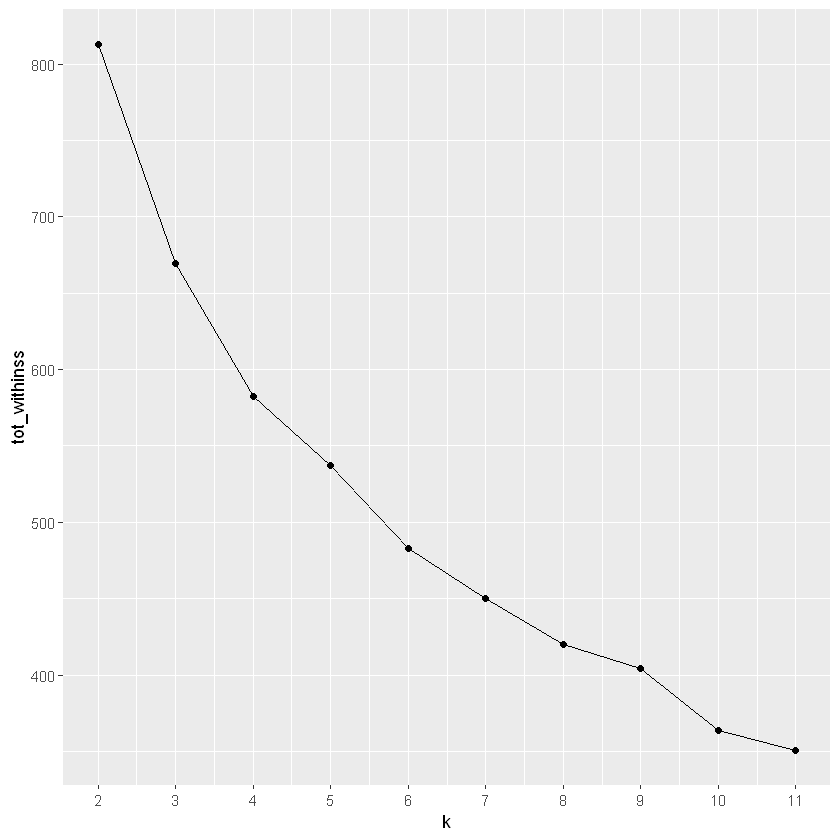

In [38]:
# Utilisation de map_dbl pour modéliser la variation du nombre k de catégories 
tot_withinss <- map_dbl(2:11, function(k){
    model <- kmeans(x = scaled_data, centers = k)
    model$tot.withinss
})
 
# Création d'un dataframe contenant k et tot_withinss (total de la somme au carré des valeurs à l'intérieur des clusters)
elbow_df <- data.frame(
    k = 2:11,
    tot_withinss = tot_withinss
)

 
# Graphique selon la méthode du "coude"
ggplot(elbow_df, aes(x = k, y = tot_withinss)) +
    geom_line() + geom_point()+
    scale_x_continuous(breaks = 2:11)

Le graphique indique qu'au delà de trois clusters, le total au carré des valeurs cesse de diminuer et qu'à l'inverse l'intertie, elle, diminue. Cela suggère que 4 catégories suffisent à caractériser les individus de notre dataframe.

- Méthode de la Silhouette

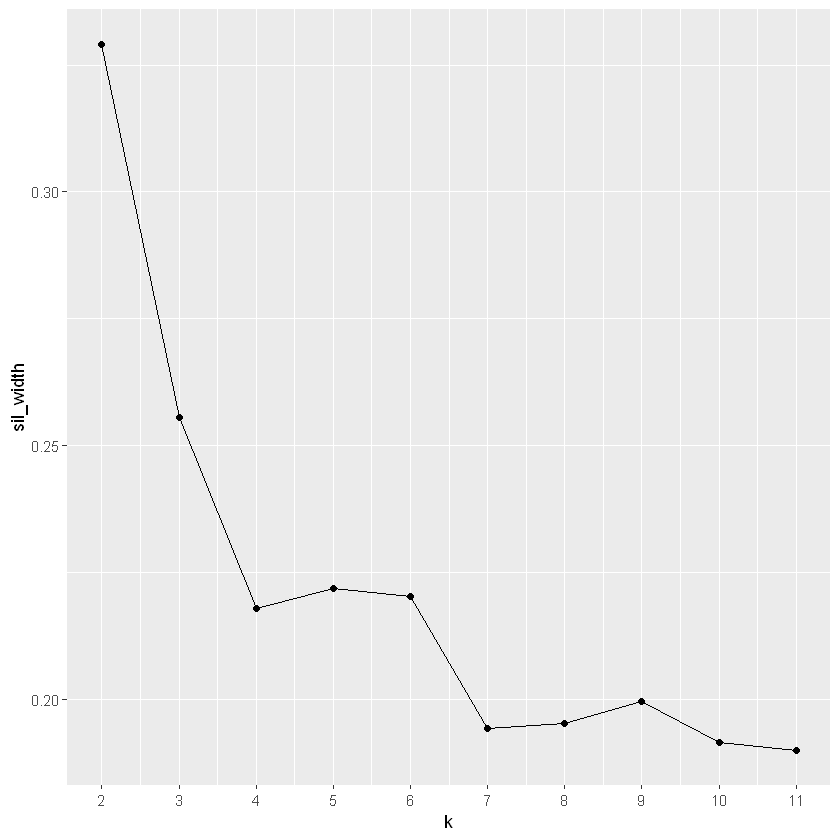

In [39]:
# Utilisation de map_dbl pour modéliser la variation du nombre k de catégories 
sil_width <- map_dbl(2:11,  function(k){
  model <- pam(x = scaled_data, k = k)
  model$silinfo$avg.width
})
 
# Création d'un dataframe contenant k et sil_width (largeur de la silhouette)
sil_df <- data.frame(
  k = 2:11,
  sil_width = sil_width
)
 
# Graphique de la Silhouette
ggplot(sil_df, aes(x = k, y = sil_width)) +
  geom_line() + geom_point() +
  scale_x_continuous(breaks = 2:11)

Selon la méthode de la Silhouette, le nombre de clusters idéal serait de 4.

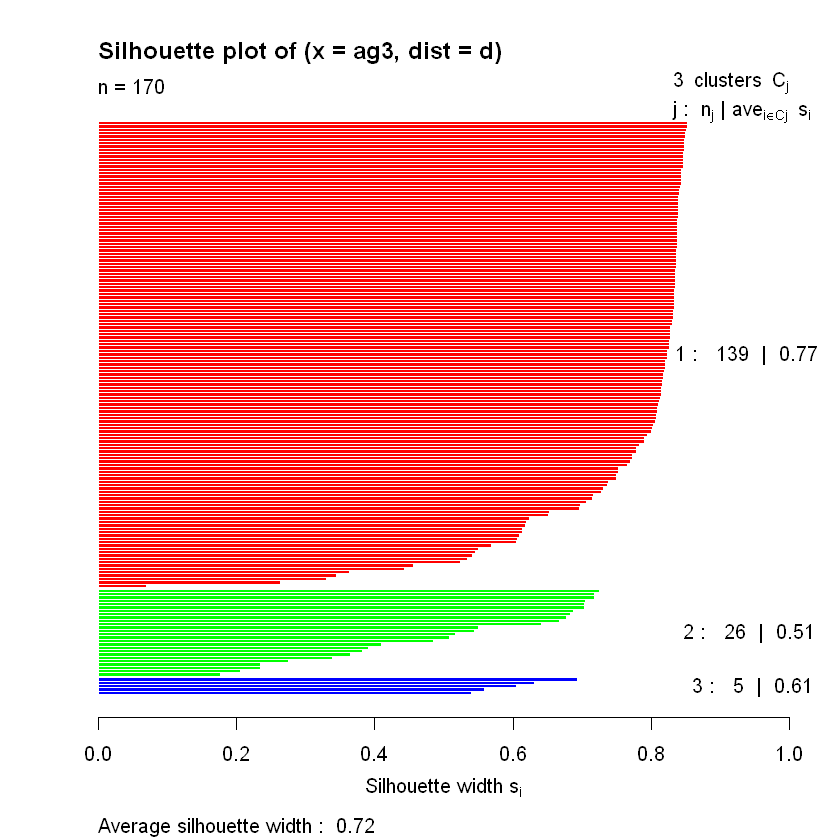

In [40]:
# Graphique de Silhouette
attach(data)
d = dist(data[,-1],method="euclidean")

ag=agnes(d, method = "average")
ag3 = cutree(ag,3)
si=silhouette(ag3,d)
plot(si,col=c("red", "green", "blue"))


Le graphique renvoie une largeur de silhouette de 0.73. La partition représente 3 groupes déséquilibrés avec 139 individus dans le 1er groupe, 26 dans le 2e groupe et 5 dans le 3e groupe.

#### Classification hiérarchique

In [41]:
# Matrice des distances entre individus
d.data <- dist(scaled_data)

# CAH - critère de Ward
cah.ward <- hclust(d.data,method="ward.D2")

NULL

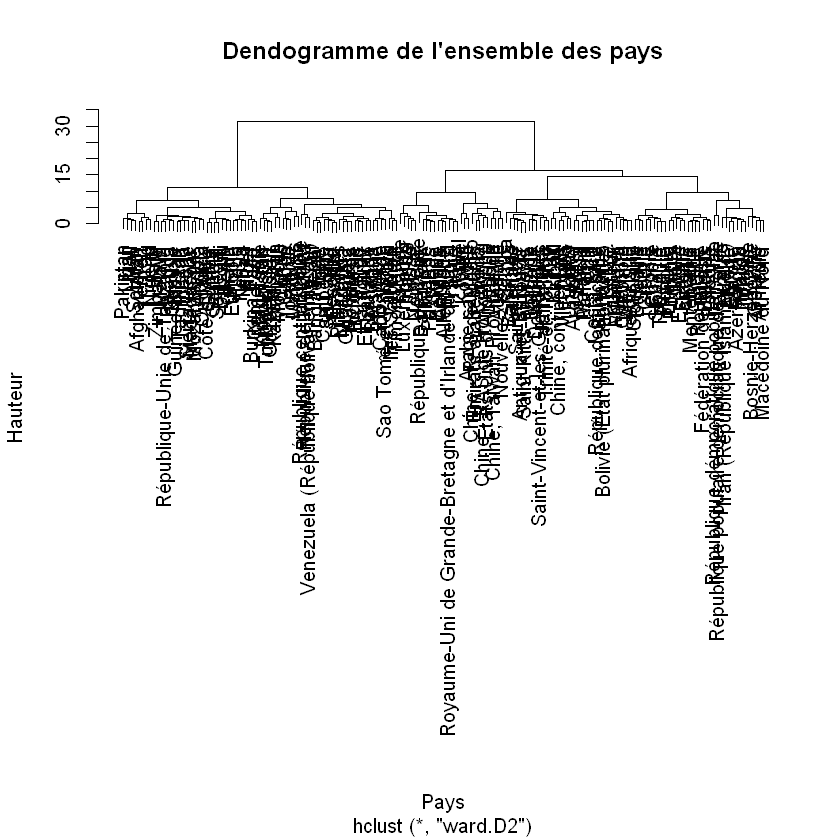

In [42]:
# Affichage dendogramme
dendogramme <- plot(cah.ward, main= 'Dendogramme de l\'ensemble des pays', xlab='Pays', ylab='Hauteur')
dendogramme

In [43]:
# Sauvegarde du dendogramme
jpeg(file="dendogramme.jpeg",
    width=640, height=640)
dendogramme <- plot(cah.ward, main= 'Dendogramme de l\'ensemble des pays', xlab='Pays', ylab='Hauteur')
dev.off()

png 
  2

In [44]:
dim(data)

[1] 170   9

In [45]:
# Application de la classification hiérarchique
res.HCPC <- HCPC(scaled_data,nb.clust=5,graph=TRUE)
res.HCPC

**Results for the Hierarchical Clustering on Principal Components**
   name                   
1  "$data.clust"          
2  "$desc.var"            
3  "$desc.var$quanti.var" 
4  "$desc.var$quanti"     
5  "$desc.axes"           
6  "$desc.axes$quanti.var"
7  "$desc.axes$quanti"    
8  "$desc.ind"            
9  "$desc.ind$para"       
10 "$desc.ind$dist"       
11 "$call"                
12 "$call$t"              
   description                                             
1  "dataset with the cluster of the individuals"           
2  "description of the clusters by the variables"          
3  "description of the cluster var. by the continuous var."
4  "description of the clusters by the continuous var."    
5  "description of the clusters by the dimensions"         
6  "description of the cluster var. by the axes"           
7  "description of the clusters by the axes"               
8  "description of the clusters by the individuals"        
9  "parangons of each clusters"          

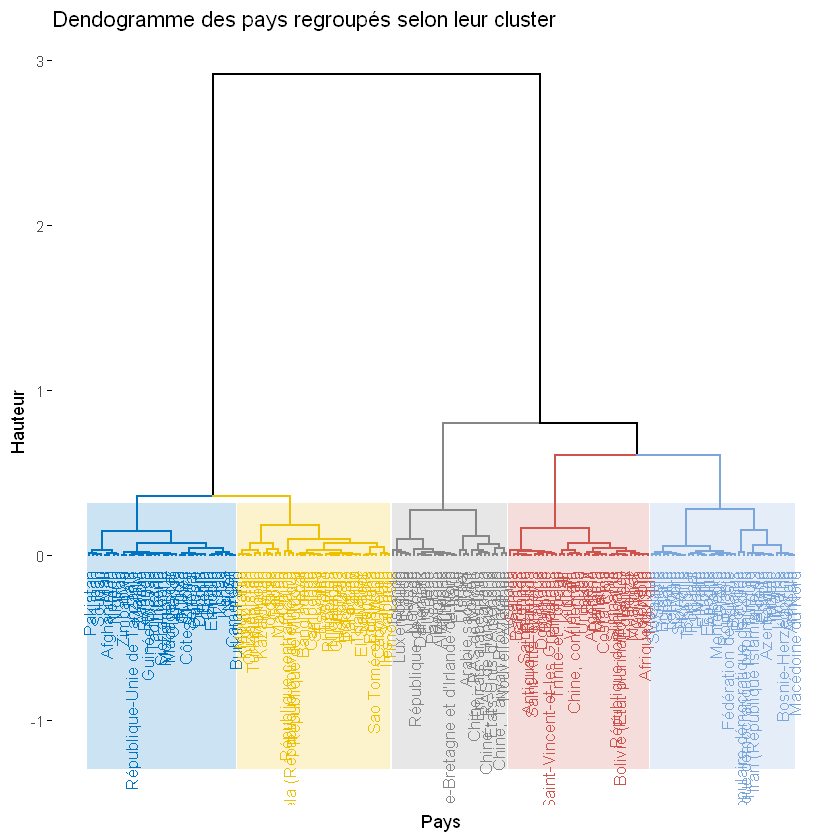

In [46]:
dendogramme_cluster <- fviz_dend(res.HCPC, 
          cex = 0.7,                    # Taille du texte
          palette = "jco",              # Palette de couleur ?ggpubr::ggpar
          rect = TRUE, rect_fill = TRUE, # Rectangle autour des groupes
          rect_border = "jco",           # Couleur du rectangle
          labels_track_height = 0.8,      # Augment l'espace pour le texte
          main='Dendogramme des pays regroupés selon leur cluster',   # Titre
                                  xlab='Pays', ylab='Hauteur'
          )
dendogramme_cluster

In [47]:
# Sauvegarde du dendogramme
jpeg(file="dendogramme_cluster.jpeg",
    width=640, height=640)
dendogramme_cluster
dev.off()

png 
  2

In [48]:
# Attribution des individus aux clusters
data_clust <- res.HCPC$data.clust

In [49]:
# Liste des pays selon leur groupe
liste_pays_clust <- data_clust %>% 
    arrange(clust) %>%
    select(clust)
head(liste_pays_clust)

,clust
Afghanistan,1
Angola,1
Bénin,1
Burkina Faso,1
Bangladesh,1
République centrafricaine,1


In [50]:
# Création d'un fichier CSV listant les pays selon leur cluster d'appartenance
write.table(liste_pays_clust, "liste_pays_clusters.csv", row.names=TRUE, sep=",", dec=".", na=" ")

#### Aggrégation des valeurs par clusters

In [51]:
# Aggrégation et détermination des valeurs moyennes pour chaque cluster 
data_clust_agg <- data_clust %>%
    aggregate(list(data_clust$clust), mean, na.rm=TRUE)
data_clust_agg

Warning message in mean.default(X[[i]], ...):
"argument is not numeric or logical: returning NA"Warning message in mean.default(X[[i]], ...):
"argument is not numeric or logical: returning NA"Warning message in mean.default(X[[i]], ...):
"argument is not numeric or logical: returning NA"Warning message in mean.default(X[[i]], ...):
"argument is not numeric or logical: returning NA"Warning message in mean.default(X[[i]], ...):
"argument is not numeric or logical: returning NA"

Group.1,Dispo_alim_Kcal_pers_jour,Dispo_prot_g_pers_jour,part_prot_anim,tx_crois_2013_18,PIB_hab_dollar,indice_stab_pol,conso_volail_kg_pers,Distance_France_km,clust
1,-1.1106173,-1.0785220,-1.2913915,1.0560744,-0.64941638,-1.0799558,-0.9926227,0.09194844,NA
2,-0.4071432,-0.4201162,-0.3225891,0.3098234,-0.49756738,-0.1731335,-0.3940288,-0.48511120,NA
3,0.2268340,0.1531414,0.6749809,-0.3606484,0.10309963,0.6391250,1.2744252,-0.89666918,NA
4,0.8046019,0.7598424,0.5183776,-1.0553085,-0.04123517,0.2448952,0.0330349,1.04275477,NA
5,1.3190126,1.4733600,1.1928345,-0.4148301,2.16586474,0.9559376,0.6062780,0.71633355,NA


In [52]:
# Suppression de la colonne "clust"
data_clust_agg$clust <- NULL

# Indexation de la colonne "Group.1"
rownames(data_clust_agg) <- data_clust_agg$Group.1
data_clust_agg

Group.1,Dispo_alim_Kcal_pers_jour,Dispo_prot_g_pers_jour,part_prot_anim,tx_crois_2013_18,PIB_hab_dollar,indice_stab_pol,conso_volail_kg_pers,Distance_France_km
1,-1.1106173,-1.0785220,-1.2913915,1.0560744,-0.64941638,-1.0799558,-0.9926227,0.09194844
2,-0.4071432,-0.4201162,-0.3225891,0.3098234,-0.49756738,-0.1731335,-0.3940288,-0.48511120
3,0.2268340,0.1531414,0.6749809,-0.3606484,0.10309963,0.6391250,1.2744252,-0.89666918
4,0.8046019,0.7598424,0.5183776,-1.0553085,-0.04123517,0.2448952,0.0330349,1.04275477
5,1.3190126,1.4733600,1.1928345,-0.4148301,2.16586474,0.9559376,0.6062780,0.71633355


In [53]:
# Création d'un fichier CSV regroupant les valeurs moyennes normalisées de chacun des clusters
write.table(data_clust_agg, "centroïdes_groupes.csv", row.names=FALSE, sep=",", dec=".", na=" ")

In [54]:
scaled_data_clust <- scale(data_clust_agg[,2:9], center=T, scale=T)
scaled_data_clust

Dispo_alim_Kcal_pers_jour,Dispo_prot_g_pers_jour,part_prot_anim,tx_crois_2013_18,PIB_hab_dollar,indice_stab_pol,conso_volail_kg_pers,Distance_France_km
-1.3280670,-1.2633954,-1.4834603,1.4296609,-0.76364247,-1.5115953,-1.25177611,-0.002358262
-0.5965498,-0.6011462,-0.4894458,0.5011688,-0.62967415,-0.3667574,-0.56937341,-0.717530575
0.0627000,-0.0245421,0.5340849,-0.3330380,-0.09973754,0.6586966,1.33268019,-1.227590291
0.6634999,0.5857005,0.3734062,-1.1973403,-0.22707647,0.1609924,-0.08251666,1.176012785
1.1984169,1.3033832,1.0654151,-0.4004514,1.72013062,1.0586637,0.57098599,0.771466343


In [55]:
# Tentative de création d'un index
rownames(scaled_data_clust) <- 1:nrow(scaled_data_clust)
scaled_data_clust

Dispo_alim_Kcal_pers_jour,Dispo_prot_g_pers_jour,part_prot_anim,tx_crois_2013_18,PIB_hab_dollar,indice_stab_pol,conso_volail_kg_pers,Distance_France_km
-1.3280670,-1.2633954,-1.4834603,1.4296609,-0.76364247,-1.5115953,-1.25177611,-0.002358262
-0.5965498,-0.6011462,-0.4894458,0.5011688,-0.62967415,-0.3667574,-0.56937341,-0.717530575
0.0627000,-0.0245421,0.5340849,-0.3330380,-0.09973754,0.6586966,1.33268019,-1.227590291
0.6634999,0.5857005,0.3734062,-1.1973403,-0.22707647,0.1609924,-0.08251666,1.176012785
1.1984169,1.3033832,1.0654151,-0.4004514,1.72013062,1.0586637,0.57098599,0.771466343


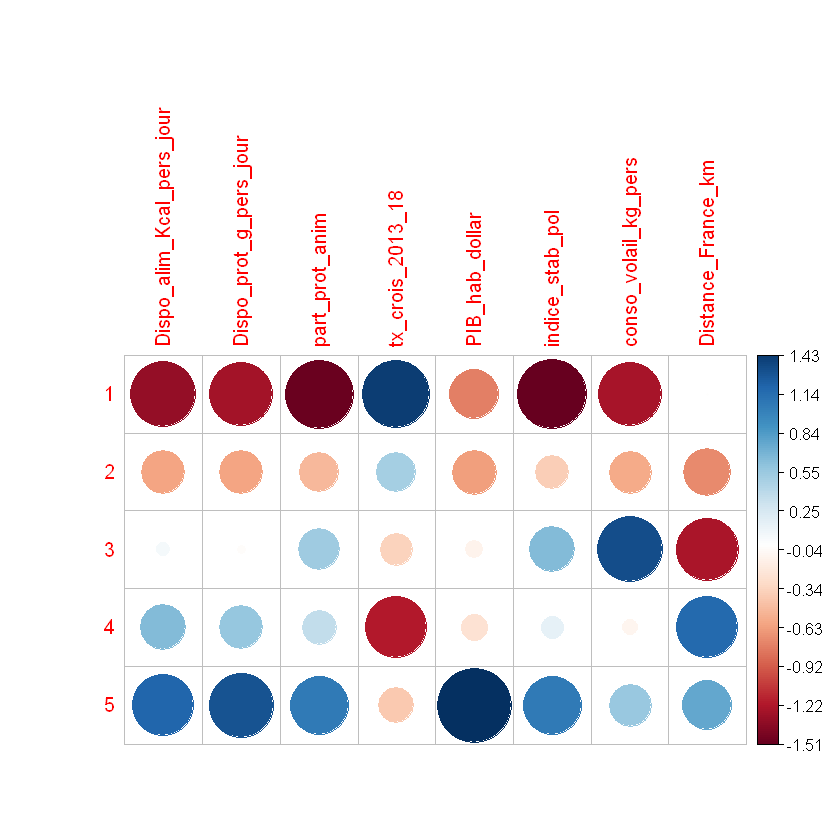

In [56]:
# Heatmap de corrélation
corrplot(scaled_data_clust,is.corr=FALSE)

#### Visualisation graphique des clusters

Warning message:
"ggrepel: 123 unlabeled data points (too many overlaps). Consider increasing max.overlaps"

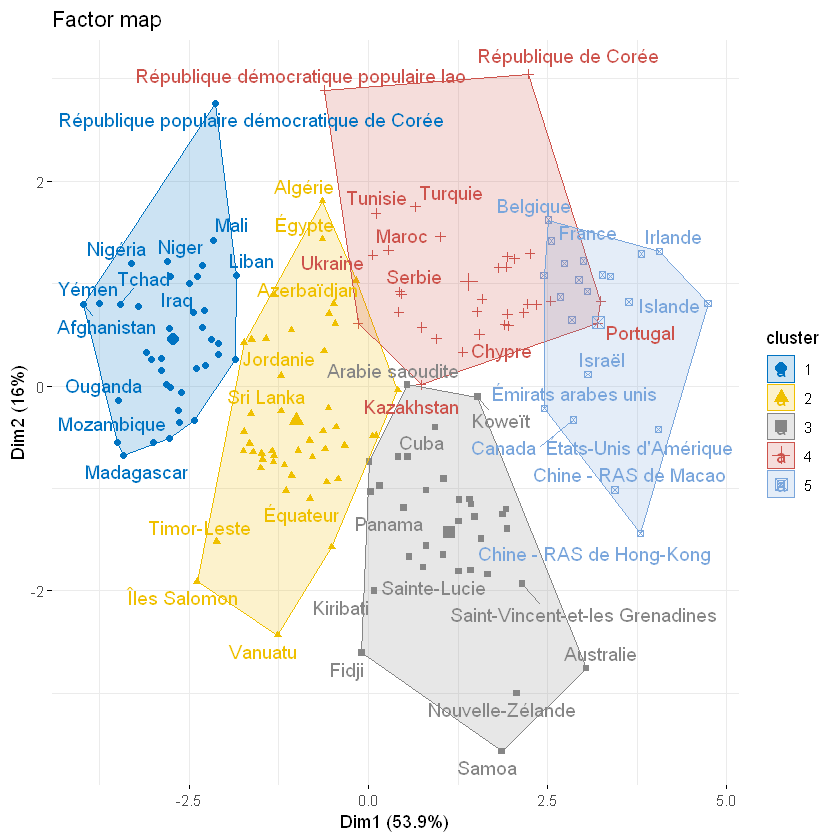

In [57]:
fviz_cluster(res.HCPC,
             repel = TRUE,            # Evite le chevauchement des textes
             show.clust.cent = TRUE, # Montre le centre des clusters
             palette = "jco",         # Palette de couleurs, voir ?ggpubr::ggpar
             ggtheme = theme_minimal(),
             main = "Factor map"
             )

Le graphique confirme la carte de chaleur, à savoir que la 1e dimension contribue à 54,2% de l'inertie des données.
On constate que le cluster n°5 se détache des autres. Celui-ci semble donc mieux répondre aux attentes de notre étude de marché.

## 6. ACP (Analyse en composantes principales) <a class='anchor' id='ACP'></a>

In [58]:
# Standardisation des données et ACP
res.pca <- PCA(scaled_data, scale.unit=TRUE, graph=FALSE)
res.pca

**Results for the Principal Component Analysis (PCA)**
The analysis was performed on 170 individuals, described by 8 variables
*The results are available in the following objects:

   name               description                          
1  "$eig"             "eigenvalues"                        
2  "$var"             "results for the variables"          
3  "$var$coord"       "coord. for the variables"           
4  "$var$cor"         "correlations variables - dimensions"
5  "$var$cos2"        "cos2 for the variables"             
6  "$var$contrib"     "contributions of the variables"     
7  "$ind"             "results for the individuals"        
8  "$ind$coord"       "coord. for the individuals"         
9  "$ind$cos2"        "cos2 for the individuals"           
10 "$ind$contrib"     "contributions of the individuals"   
11 "$call"            "summary statistics"                 
12 "$call$centre"     "mean of the variables"              
13 "$call$ecart.type" "standard error o

In [59]:
# Graphique des variables
var <- get_pca_var(res.pca)
var

Principal Component Analysis Results for variables
  Name       Description                                    
1 "$coord"   "Coordinates for the variables"                
2 "$cor"     "Correlations between variables and dimensions"
3 "$cos2"    "Cos2 for the variables"                       
4 "$contrib" "contributions of the variables"               

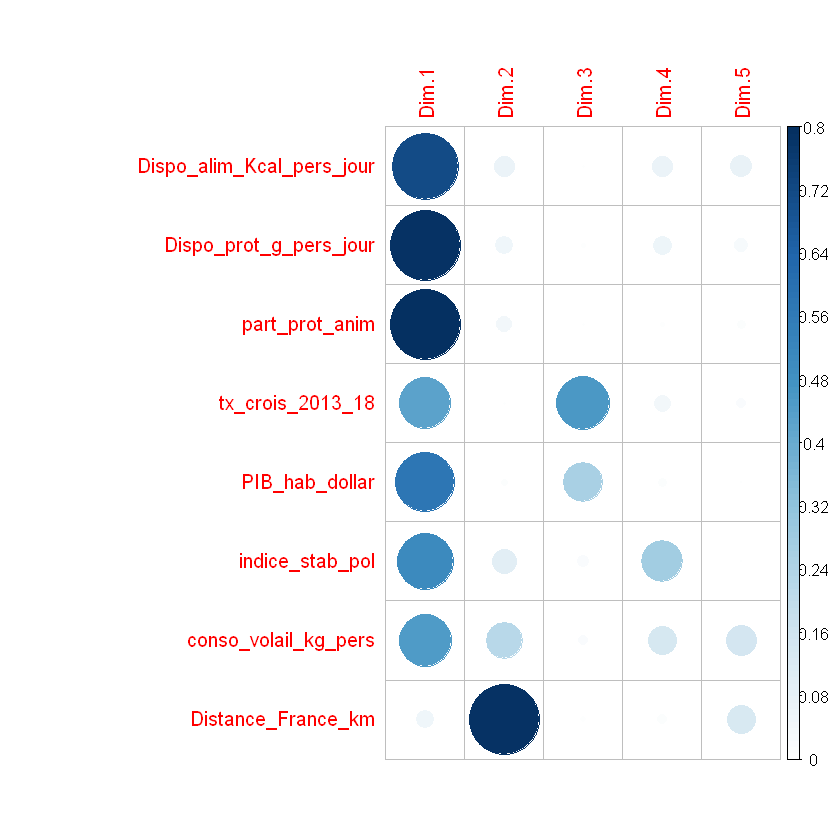

In [60]:
# Visualisation du cos2 des variables, qui informe sur la qualité de 
# la réprésentation des variables
corrplot(var$cos2, is.corr=FALSE)

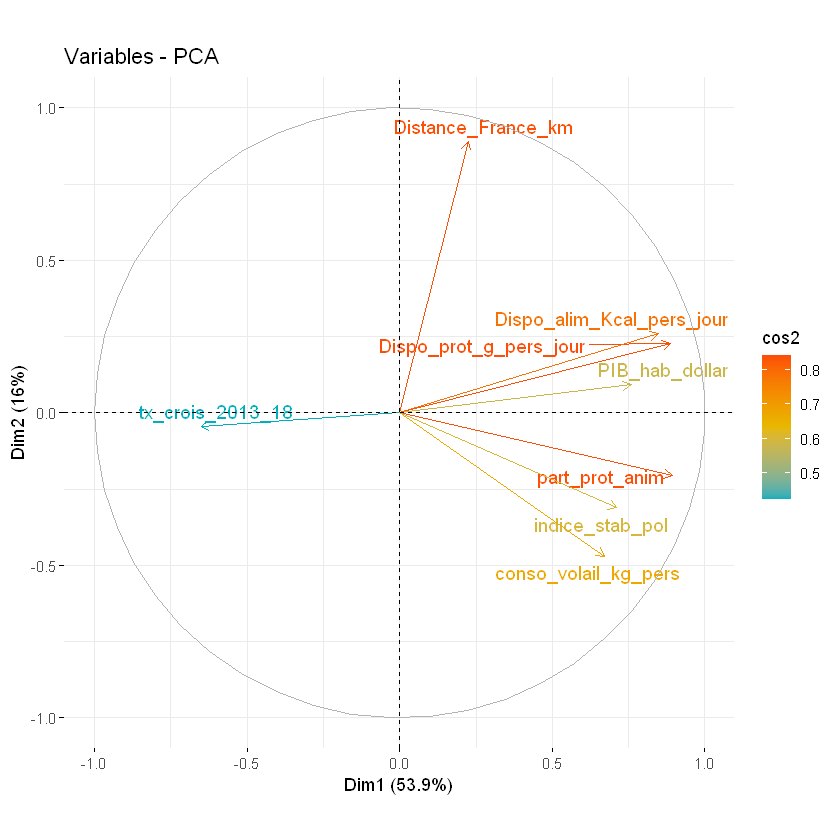

In [61]:
fviz_pca_var(res.pca, col.var="cos2",
            gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
            repel=TRUE
            )

La disponibilité alimentaire, la disponibilité en protéine et le PIB par habitant semblent former un groupe relativement homogène. De même, la part des protéines animales consommées, l'indice de stabilité politique et la consommation de volaille présentent une certaine proximité. Le taux de croissance démographique apparaît corrélé négativement à ces tendances. Enfin, la distance avec la France se détache nettement de ces tendances.

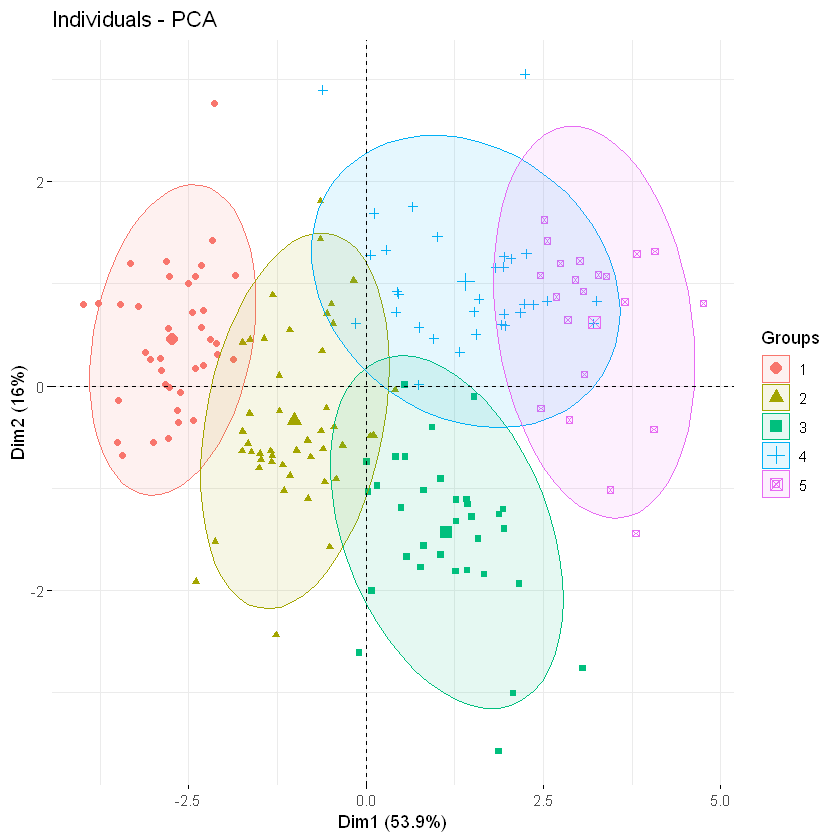

In [62]:
fviz_pca_ind(res.pca, label="none", habillage=data_clust$clust,
             addEllipses=TRUE, ellipse.level=0.90)

Le graphique confirme que le cluster 5 regroupe les marchés les plus  propices à l'exportation de volailles.

## 7. Analyse des pays du cluster 5  <a class='anchor' id='analyse'></a>

In [63]:
# Restriction et préparation du tableau pour la jointure
data_clust_5 <- data_clust %>% filter(clust==5) %>%
    select(clust)
head(data_clust_5)

,clust
Émirats arabes unis,5
Autriche,5
Belgique,5
Canada,5
Suisse,5
Allemagne,5


In [64]:
# Jointure avec le dataframe principal
data_clust_5 <- merge(data_clust_5, data, by.x = 0, by.y = 0, all.x = TRUE, all.y = TRUE)

In [65]:
# Restriction aux pays des clusters 5
data_clust_5 <- data_clust_5[complete.cases(data_clust_5),]
head(data_clust_5)

,Row.names,clust,Code.zone,Dispo_alim_Kcal_pers_jour,Dispo_prot_g_pers_jour,part_prot_anim,tx_crois_2013_18,PIB_hab_dollar,indice_stab_pol,conso_volail_kg_pers,Distance_France_km
5,Allemagne,5,DEU,3554,105.40,60.74953,2.402299,43429.27,0.60,19.47,-880.6348
12,Autriche,5,AUT,3695,109.12,60.32808,3.917620,46743.06,0.92,18.20,-1036.7114
18,Belgique,5,BEL,3769,99.87,58.65625,2.942162,42207.54,0.41,12.65,-264.6008
30,Canada,5,CAN,3566,104.12,54.49918,5.037419,44668.13,0.99,39.02,-6016.7294
32,Chine - RAS de Hong-Kong,5,HKG,3267,128.53,73.08800,3.991548,45517.56,0.79,53.51,-9645.8558
33,Chine - RAS de Macao,5,MAC,3327,109.47,64.77574,9.398447,81686.03,1.26,34.47,-9614.5929


In [66]:
# Suppresion de la colonne "clust"
data_clust_5$clust <- NULL

### Projection du dataframe avec élimination des variables jugées redondantes dans notre ACP

In [67]:
new_df <- data_clust_5 %>% 
    select(Row.names, tx_crois_2013_18, conso_volail_kg_pers, PIB_hab_dollar, Distance_France_km)

In [68]:
rownames(new_df) <- new_df$Row.names

new_df$Row.names <- NULL

head(new_df)

,tx_crois_2013_18,conso_volail_kg_pers,PIB_hab_dollar,Distance_France_km
Allemagne,2.402299,19.47,43429.27,-880.6348
Autriche,3.917620,18.20,46743.06,-1036.7114
Belgique,2.942162,12.65,42207.54,-264.6008
Canada,5.037419,39.02,44668.13,-6016.7294
Chine - RAS de Hong-Kong,3.991548,53.51,45517.56,-9645.8558
Chine - RAS de Macao,9.398447,34.47,81686.03,-9614.5929


In [69]:
# Mise à l'échelle des données (centrage et réduction)
new_scaled_data <- as.data.frame(scale(new_df, center=T,scale=T))
head(new_scaled_data)

,tx_crois_2013_18,conso_volail_kg_pers,PIB_hab_dollar,Distance_France_km
Allemagne,-0.7206683,-0.6775605,-0.6243669,0.5713049
Autriche,-0.1361237,-0.7633900,-0.4512341,0.5186412
Belgique,-0.5124129,-1.1384716,-0.6881979,0.7791687
Canada,0.2958456,0.6436729,-0.5596410,-1.1617289
Chine - RAS de Hong-Kong,-0.1076055,1.6229400,-0.5152615,-2.3862778
Chine - RAS de Macao,1.9781392,0.3361735,1.3744047,-2.3757290


### Classification ascendante hiérarchique du nouveau dataframe

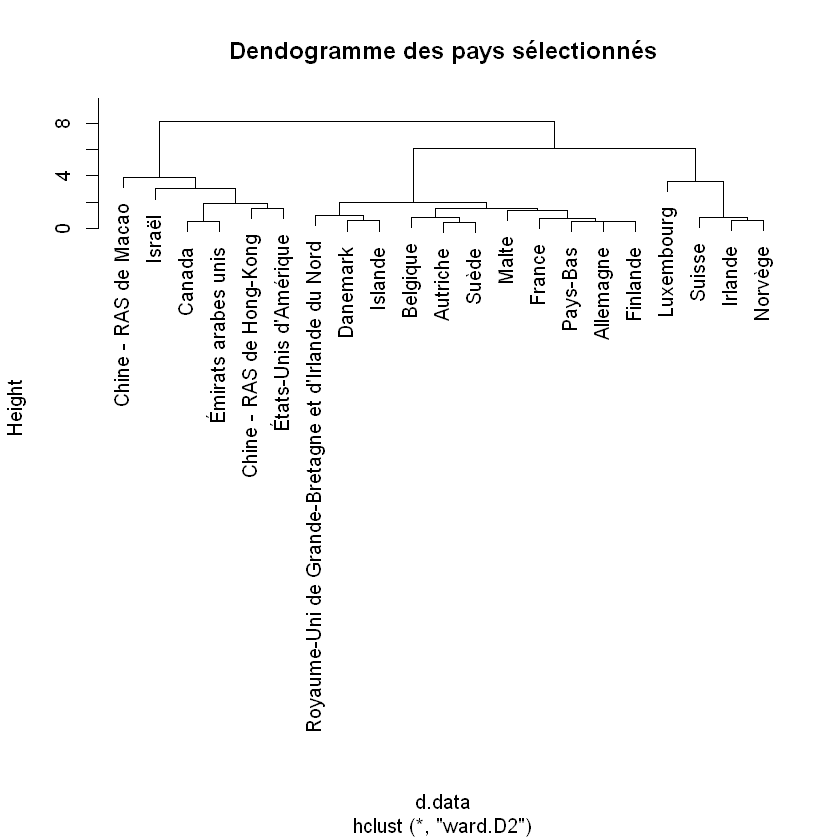

In [70]:
# Matrice des distances entre individus
d.data <- dist(new_scaled_data)

# CAH - critère de Ward
cah.ward <- hclust(d.data,method="ward.D2")

# Affichage dendogramme
plot(cah.ward, main= 'Dendogramme des pays sélectionnés')

In [71]:
# Application de la classification hiérarchique
res.HCPC_2 <- HCPC(new_scaled_data,nb.clust=5,graph=TRUE)
res.HCPC

**Results for the Hierarchical Clustering on Principal Components**
   name                   
1  "$data.clust"          
2  "$desc.var"            
3  "$desc.var$quanti.var" 
4  "$desc.var$quanti"     
5  "$desc.axes"           
6  "$desc.axes$quanti.var"
7  "$desc.axes$quanti"    
8  "$desc.ind"            
9  "$desc.ind$para"       
10 "$desc.ind$dist"       
11 "$call"                
12 "$call$t"              
   description                                             
1  "dataset with the cluster of the individuals"           
2  "description of the clusters by the variables"          
3  "description of the cluster var. by the continuous var."
4  "description of the clusters by the continuous var."    
5  "description of the clusters by the dimensions"         
6  "description of the cluster var. by the axes"           
7  "description of the clusters by the axes"               
8  "description of the clusters by the individuals"        
9  "parangons of each clusters"          

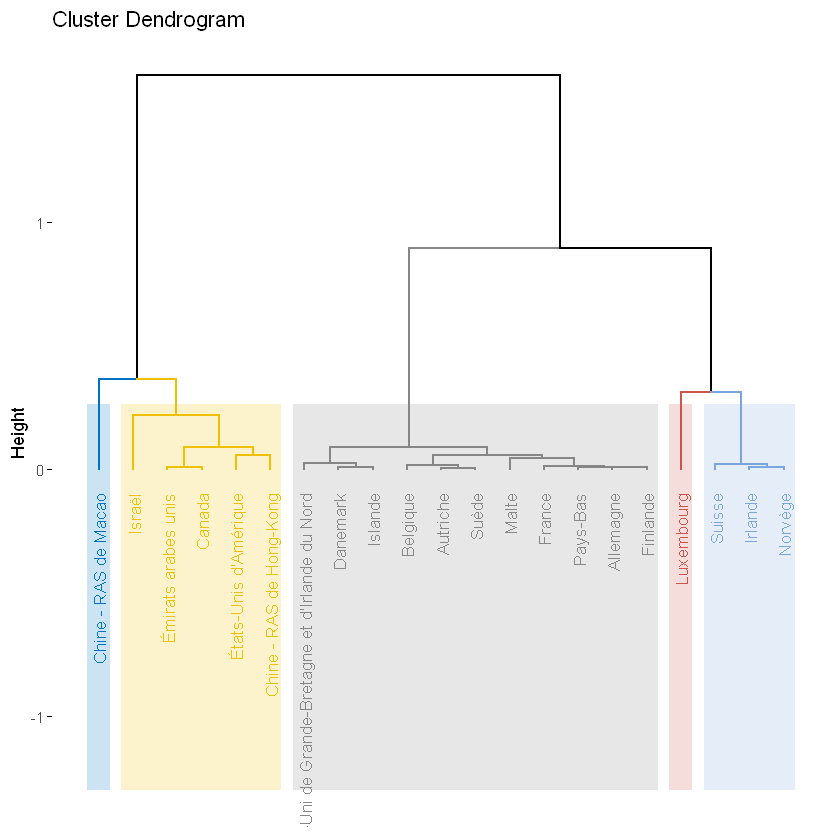

In [72]:
fviz_dend(res.HCPC_2, 
          cex = 0.7,                    # Taille du texte
          palette = "jco",              # Palette de couleur ?ggpubr::ggpar
          rect = TRUE, rect_fill = TRUE, # Rectangle autour des groupes
          rect_border = "jco",           # Couleur du rectangle
          labels_track_height = 0.8      # Augment l'espace pour le texte
          )

### Visualisation graphique des clusters

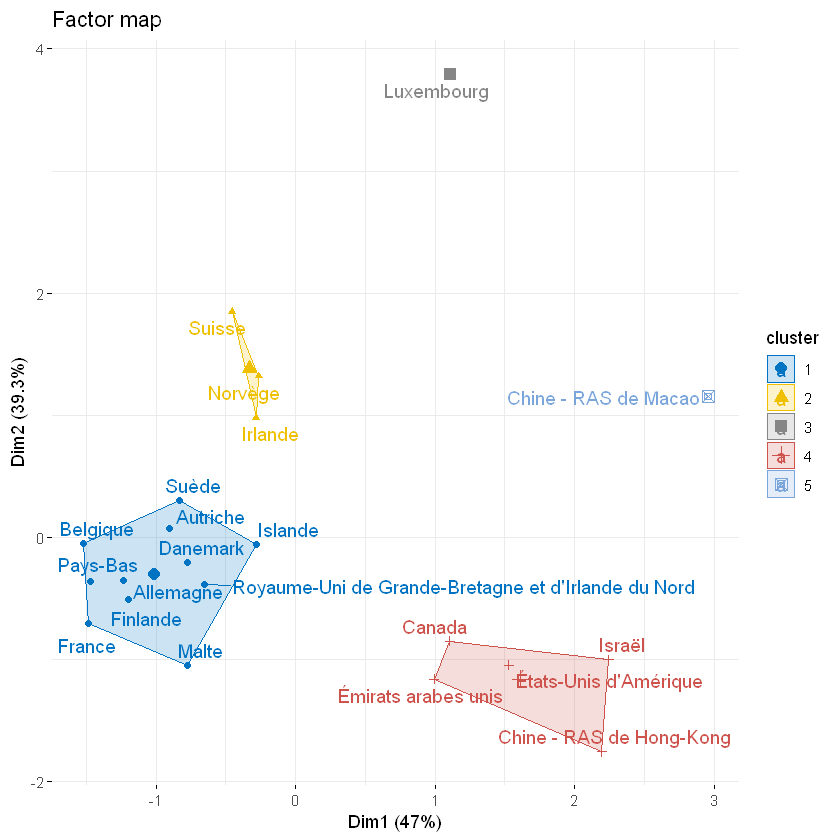

In [73]:
fviz_cluster(res.HCPC_2,
             repel = TRUE,            # Evite le chevauchement des textes
             show.clust.cent = TRUE, # Montre le centre des clusters
             palette = "jco",         # Palette de couleurs, voir ?ggpubr::ggpar
             ggtheme = theme_minimal(),
             main = "Factor map"
             )

Les pays des clusters 3 4 et 5 sont graphiquement isolés mais ils apparaissent regrouper les critères les plus favorables à l'implantation d'une activité de distribution de poulets.

In [74]:
# Attribution des individus aux clusters
new_data_clust <- res.HCPC_2$data.clust
new_data_clust %>% 
    arrange(clust)

,tx_crois_2013_18,conso_volail_kg_pers,PIB_hab_dollar,Distance_France_km,clust
Allemagne,-0.72066832,-0.67756055,-0.62436691,0.5713049,1
Autriche,-0.13612368,-0.76339003,-0.45123413,0.5186412,1
Belgique,-0.51241285,-1.13847164,-0.68819787,0.7791687,1
Danemark,-0.86752354,-0.03485314,0.07091857,0.5212853,1
Finlande,-1.05448515,-0.72554396,-0.51562014,0.2228867,1
France,-0.98506641,-0.44575335,-0.90872260,0.8684509,1
Islande,-0.52424670,0.03070166,0.24490145,0.1140584,1
Malte,-0.46181633,-0.15717705,-1.33809932,0.2791804,1
Pays-Bas,-1.15254594,-0.61943979,-0.36827897,0.7230600,1
Royaume-Uni de Grande-Bretagne et d'Irlande du Nord,-0.36654274,0.16519038,-0.47357505,0.7523315,1


In [75]:
# Aggrégation et détermination des valeurs moyennes pour chaque cluster 
new_data_clust_agg <- new_data_clust %>%
    aggregate(list(new_data_clust$clust), mean, na.rm=TRUE)
head(new_data_clust_agg)

Warning message in mean.default(X[[i]], ...):
"argument is not numeric or logical: returning NA"Warning message in mean.default(X[[i]], ...):
"argument is not numeric or logical: returning NA"Warning message in mean.default(X[[i]], ...):
"argument is not numeric or logical: returning NA"Warning message in mean.default(X[[i]], ...):
"argument is not numeric or logical: returning NA"Warning message in mean.default(X[[i]], ...):
"argument is not numeric or logical: returning NA"

Group.1,tx_crois_2013_18,conso_volail_kg_pers,PIB_hab_dollar,Distance_France_km,clust
1,-0.6373188,-0.4761654,-0.4654072,0.5178888,NA
2,0.2341674,-0.6284508,1.1774860,0.5743124,NA
3,2.7383886,-0.7546043,2.7165860,0.7712826,NA
4,0.3182952,1.5083204,-0.5007939,-1.1630536,NA
5,1.9781392,0.3361735,1.3744047,-2.3757290,NA


Au regard des résultats aggrégés, centrés et réduits, il semble qu'un plus grand nombre de critères jouent en faveur des groupes 2, 4 et 5.
En dépit d'une consommation de volaille limitée, les pays des groupes 2, 4 et 5 bénéficient d'une forte croissance économique et démographique et, en dehors du cluster 5, d'une relative proximité géographique avec la France.

In [76]:
# Nettoyage
new_data_clust_agg$clust <- NULL
rownames(new_data_clust_agg) <- new_data_clust_agg$Group.1
head(new_data_clust_agg)

Group.1,tx_crois_2013_18,conso_volail_kg_pers,PIB_hab_dollar,Distance_France_km
1,-0.6373188,-0.4761654,-0.4654072,0.5178888
2,0.2341674,-0.6284508,1.1774860,0.5743124
3,2.7383886,-0.7546043,2.7165860,0.7712826
4,0.3182952,1.5083204,-0.5007939,-1.1630536
5,1.9781392,0.3361735,1.3744047,-2.3757290


In [77]:
new_scaled_data_clust <- scale(new_data_clust_agg[,2:5], center=T, scale=T)
new_scaled_data_clust

tx_crois_2013_18,conso_volail_kg_pers,PIB_hab_dollar,Distance_France_km
-1.1282012,-0.5002713,-0.9734273,0.6176419
-0.4994097,-0.6612619,0.2327591,0.6584997
1.3074267,-0.7946269,1.3627421,0.8011309
-0.4387101,1.5976558,-0.9994077,-0.5995716
0.7588944,0.3585042,0.3773337,-1.4777009


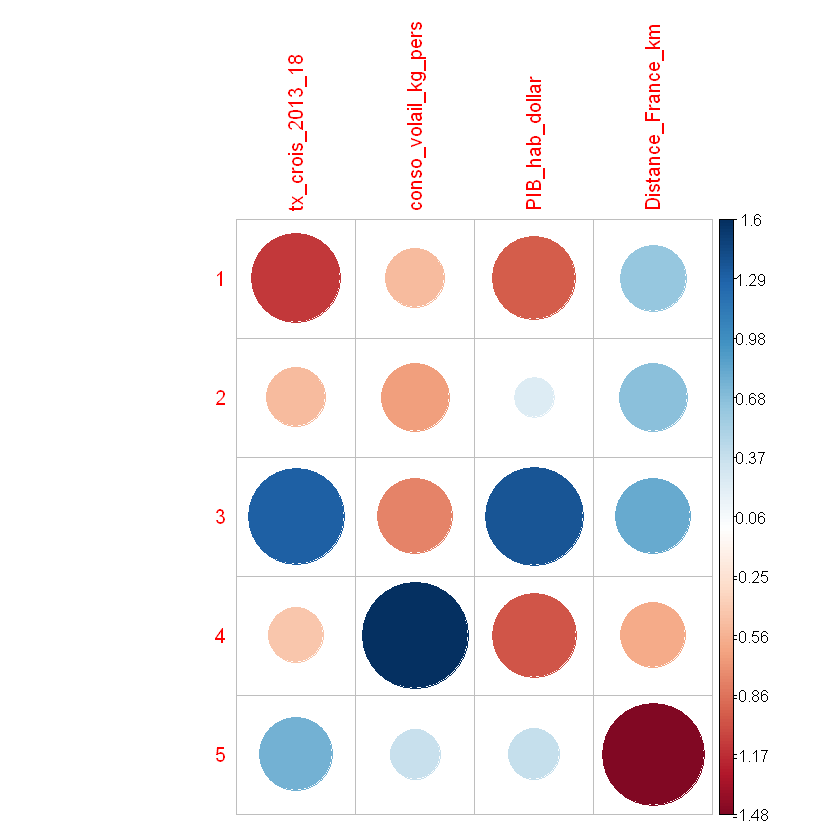

In [78]:
# Heatmap de corrélation
corrplot(new_scaled_data_clust,is.corr=FALSE)

Le tableau des chaleurs semble confirmer l'exclusion du groupe 1. Les pays des groupes 2, 3 et 5 semblent nettement se détacher des autres pays. Le groupe 4 le groupe 4 présente quelques conditions favorables avec notamment une consommation de volaille élevée. Nous allons donc garder dans notre analyse les pays des groupes 2, 3, 4 et 5.

## 8. Analyse des pays des nouveaux groupes 2, 3, 4 et 5. <a class='anchor' id='analyse2'></a>

In [79]:
# Restriction et préparation du tableau pour la jointure
data_clust_2e_restrict <- new_data_clust %>% filter(clust==2 | clust==3 | clust==4 | clust==5) %>%
    select(clust)
data_clust_2e_restrict

,clust
Canada,4
Chine - RAS de Hong-Kong,4
Chine - RAS de Macao,5
Émirats arabes unis,4
États-Unis d'Amérique,4
Irlande,2
Israël,4
Luxembourg,3
Norvège,2
Suisse,2


In [80]:
# Jointure avec le dataframe principal
data_2e_restrict <- merge(data_clust_2e_restrict, data, by.x = 0, by.y = 0, all.x = TRUE, all.y = TRUE)
head(data_2e_restrict)

Row.names,clust,Code.zone,Dispo_alim_Kcal_pers_jour,Dispo_prot_g_pers_jour,part_prot_anim,tx_crois_2013_18,PIB_hab_dollar,indice_stab_pol,conso_volail_kg_pers,Distance_France_km
Afghanistan,NA,AFG,2040,55.52,19.43444,15.1918018,618.178,-2.75,1.53,-5594.2234
Afrique du Sud,NA,ZAF,2899,84.37,42.70982,7.6468936,5674.963,-0.28,35.69,-9306.6385
Albanie,NA,ALB,3360,115.74,53.34773,-0.7249147,4331.465,0.38,16.36,-1603.9445
Algérie,NA,DZA,3322,91.83,26.93020,10.7190895,4188.398,-0.79,6.38,-1345.4604
Allemagne,NA,DEU,3554,105.40,60.74953,2.4022990,43429.272,0.60,19.47,-880.6348
Angola,NA,AGO,2385,53.05,30.74458,18.4273000,3628.778,-0.32,10.56,-6478.9539


In [81]:
second_df <- data_2e_restrict[complete.cases(data_2e_restrict),]

In [82]:
rownames(second_df) <- second_df$Row.names

second_df$Row.names <- NULL
second_df$clust <- NULL

head(second_df)

,Code.zone,Dispo_alim_Kcal_pers_jour,Dispo_prot_g_pers_jour,part_prot_anim,tx_crois_2013_18,PIB_hab_dollar,indice_stab_pol,conso_volail_kg_pers,Distance_France_km
Canada,CAN,3566,104.12,54.49918,5.037419,44668.13,0.99,39.02,-6016.7294
Chine - RAS de Hong-Kong,HKG,3267,128.53,73.08800,3.991548,45517.56,0.79,53.51,-9645.8558
Chine - RAS de Macao,MAC,3327,109.47,64.77574,9.398447,81686.03,1.26,34.47,-9614.5929
Émirats arabes unis,ARE,3314,110.26,45.76456,4.708124,39543.87,0.74,43.47,-5251.8032
États-Unis d'Amérique,USA,3782,113.74,64.59780,3.380439,59728.61,0.48,55.68,-5852.7369
Irlande,IRL,3885,117.58,61.24341,4.404104,73596.61,1.03,25.82,-780.8405


Le tableau ci-dessus regroupe les données brutes des 10 pays sélectionnés pour l'implantation d'une activité d'exportation de poulets.

In [83]:
# Mise à l'échelle des données (centrage et réduction)
scaled_second_df <- as.data.frame(scale(second_df[,2:9], center=T,scale=T))
head(scaled_second_df)

,Dispo_alim_Kcal_pers_jour,Dispo_prot_g_pers_jour,part_prot_anim,tx_crois_2013_18,PIB_hab_dollar,indice_stab_pol,conso_volail_kg_pers,Distance_France_km
Canada,0.3853333,-0.87876553,-0.87662039,-0.3955102,-0.8916003,0.24788937,0.0997705,-0.4893004
Chine - RAS de Hong-Kong,-1.0530519,1.58711176,1.73149378,-0.7893084,-0.8546750,-0.04721702,0.9146941,-1.5013281
Chine - RAS de Macao,-0.7644127,-0.33831311,0.56523759,1.2465332,0.7175948,0.64628301,-0.1561234,-1.4926101
Émirats arabes unis,-0.8269512,-0.25850799,-2.10213744,-0.5194985,-1.1143559,-0.12099362,0.3500404,-0.2759911
États-Unis d'Amérique,1.4244343,0.09303863,0.54027225,-1.0194074,-0.2369102,-0.50463194,1.0367359,-0.4435690
Irlande,1.9199315,0.48095214,0.06963209,-0.6339700,0.3659422,0.30691065,-0.6426030,0.9707934


### Classification ascendante hiérarchique issue de la 2nde restriction du dataframe

#### Création d'un dendogramme

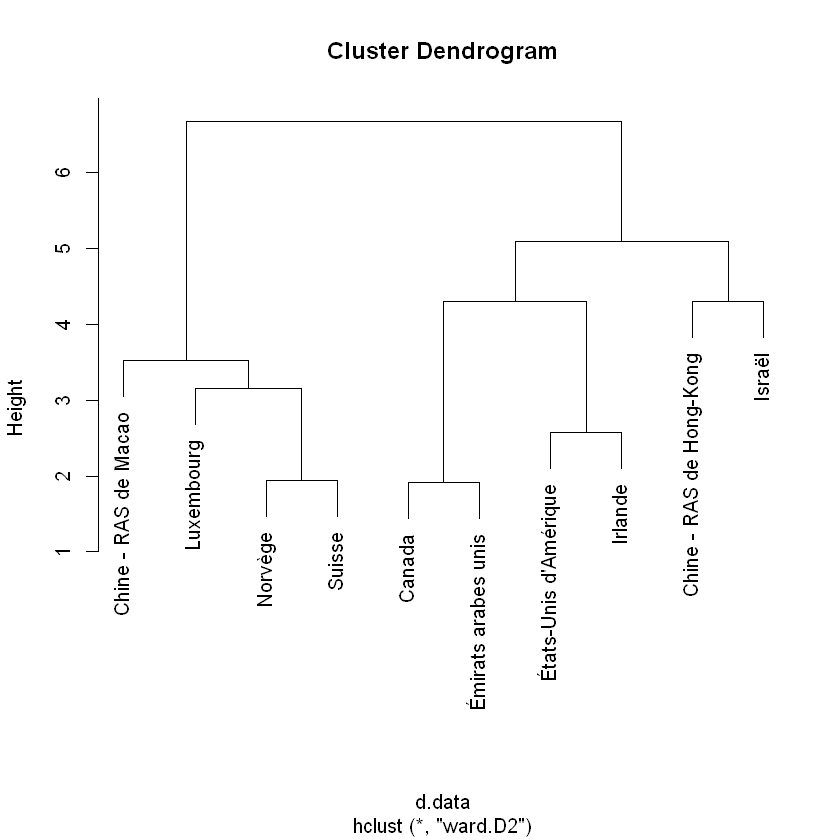

In [84]:
# Matrice des distances entre individus
d.data <- dist(scaled_second_df)

# CAH - critère de Ward
cah.ward <- hclust(d.data,method="ward.D2")

# Affichage dendogramme
plot(cah.ward)

#### Détermination du nombre idéal de clusters: méthode du Coude

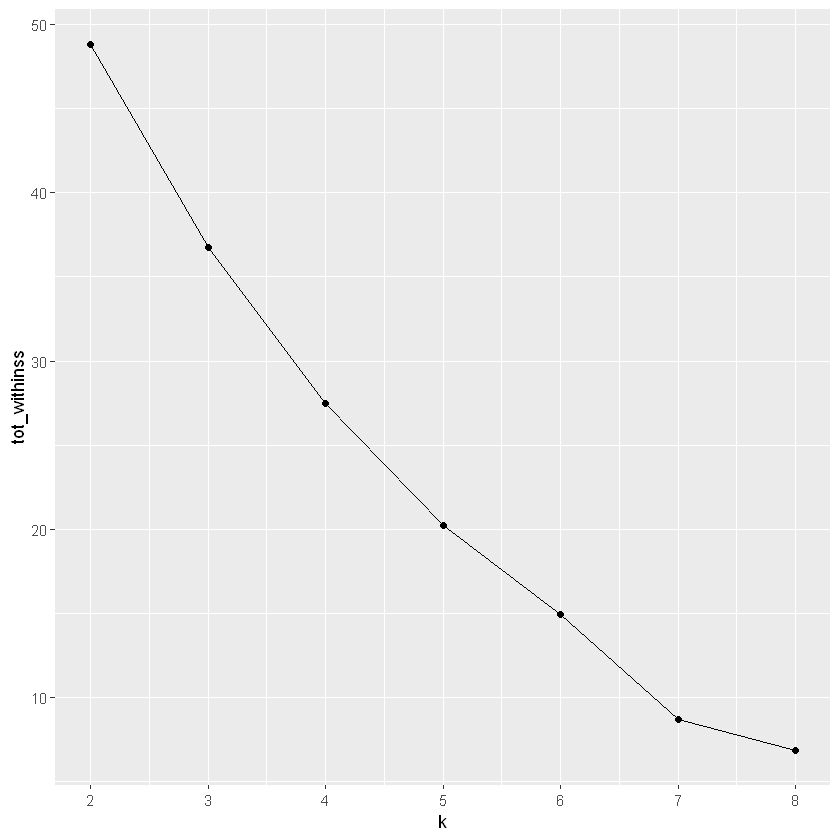

In [85]:
# Utilisation de map_dbl pour modéliser la variation du nombre k de catégories 
tot_withinss <- map_dbl(2:8, function(k){
    model <- kmeans(x = scaled_second_df, centers = k)
    model$tot.withinss
})
 
# Création d'un dataframe contenant k et tot_withinss (total de la somme au carré des valeurs à l'intérieur des clusters)
elbow_df <- data.frame(
    k = 2:8,
    tot_withinss = tot_withinss
)

 
# Graphique selon la méthode du "coude"
ggplot(elbow_df, aes(x = k, y = tot_withinss)) +
    geom_line() + geom_point()+
    scale_x_continuous(breaks = 2:8)

De ce graphique, nous pouvons déduire un léger redressement de la courbe au niveau du point 4 de la courbe.

In [86]:
# Application de la classification hiérarchique
res.HCPC_3 <- HCPC(scaled_second_df,nb.clust=3,graph=TRUE)
res.HCPC_3

**Results for the Hierarchical Clustering on Principal Components**
   name                   
1  "$data.clust"          
2  "$desc.var"            
3  "$desc.var$quanti.var" 
4  "$desc.var$quanti"     
5  "$desc.axes"           
6  "$desc.axes$quanti.var"
7  "$desc.axes$quanti"    
8  "$desc.ind"            
9  "$desc.ind$para"       
10 "$desc.ind$dist"       
11 "$call"                
12 "$call$t"              
   description                                             
1  "dataset with the cluster of the individuals"           
2  "description of the clusters by the variables"          
3  "description of the cluster var. by the continuous var."
4  "description of the clusters by the continuous var."    
5  "description of the clusters by the dimensions"         
6  "description of the cluster var. by the axes"           
7  "description of the clusters by the axes"               
8  "description of the clusters by the individuals"        
9  "parangons of each clusters"          

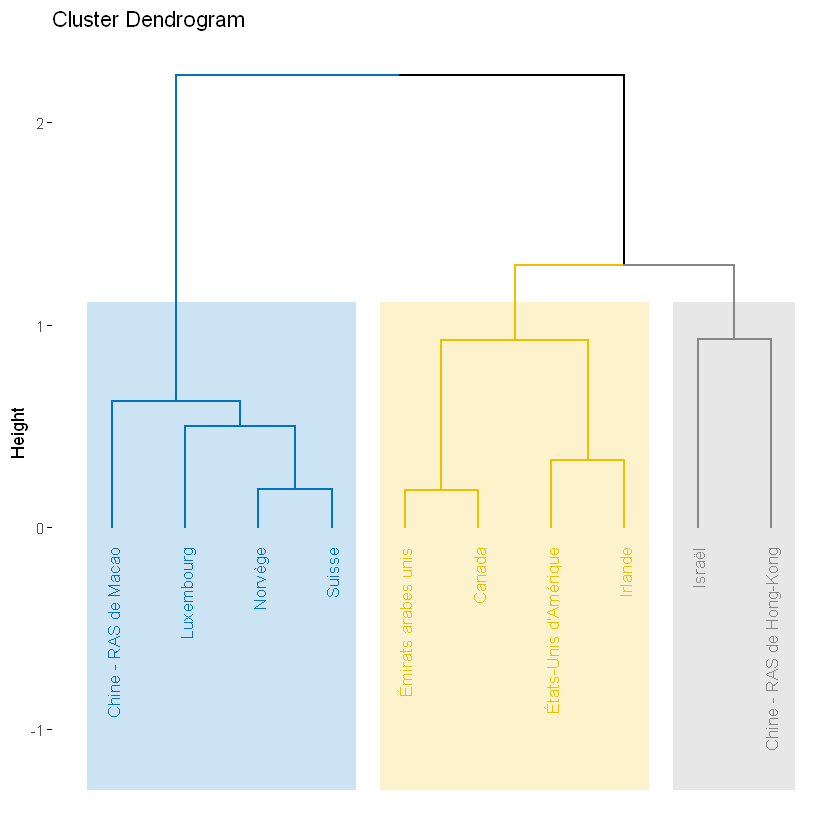

In [87]:
fviz_dend(res.HCPC_3, 
          cex = 0.7,                    # Taille du texte
          palette = "jco",              # Palette de couleur ?ggpubr::ggpar
          rect = TRUE, rect_fill = TRUE, # Rectangle autour des groupes
          rect_border = "jco",           # Couleur du rectangle
          labels_track_height = 0.8      # Augment l'espace pour le texte
          )

### Visualisation graphique des clusters

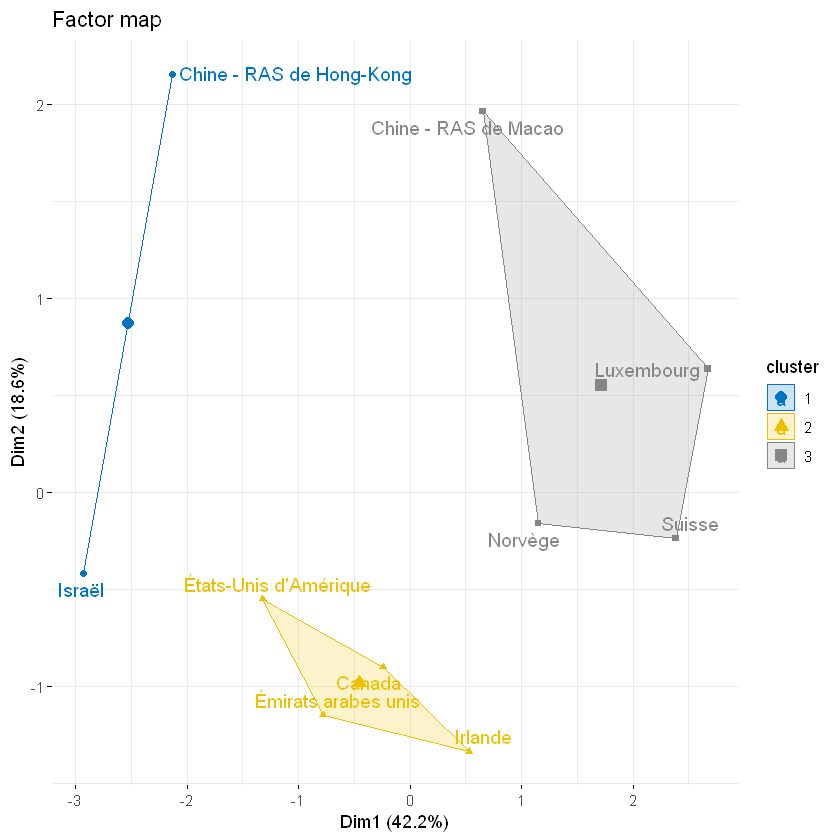

In [88]:
fviz_cluster(res.HCPC_3,
             repel = TRUE,            # Evite le chevauchement des textes
             show.clust.cent = TRUE, # Montre le centre des clusters
             palette = "jco",         # Palette de couleurs, voir ?ggpubr::ggpar
             ggtheme = theme_minimal(),
             main = "Factor map"
             )

In [89]:
# Attribution des individus aux clusters
second_data_clust <- res.HCPC_3$data.clust
second_data_clust %>% 
    arrange(clust)

,Dispo_alim_Kcal_pers_jour,Dispo_prot_g_pers_jour,part_prot_anim,tx_crois_2013_18,PIB_hab_dollar,indice_stab_pol,conso_volail_kg_pers,Distance_France_km,clust
Chine - RAS de Hong-Kong,-1.0530519,1.58711176,1.73149378,-0.7893084,-0.8546750,-0.04721702,0.9146941,-1.5013281,1
Israël,0.2025285,1.42649133,-0.26839524,0.8557361,-1.1156456,-2.58513202,1.6953111,0.2582128,1
Canada,0.3853333,-0.87876553,-0.87662039,-0.3955102,-0.8916003,0.24788937,0.0997705,-0.4893004,2
Émirats arabes unis,-0.8269512,-0.25850799,-2.10213744,-0.5194985,-1.1143559,-0.12099362,0.3500404,-0.2759911,2
États-Unis d'Amérique,1.4244343,0.09303863,0.54027225,-1.0194074,-0.2369102,-0.50463194,1.0367359,-0.4435690,2
Irlande,1.9199315,0.48095214,0.06963209,-0.6339700,0.3659422,0.30691065,-0.6426030,0.9707934,2
Chine - RAS de Macao,-0.7644127,-0.33831311,0.56523759,1.2465332,0.7175948,0.64628301,-0.1561234,-1.4926101,3
Luxembourg,-0.1005426,-0.42114881,0.18960356,1.9885930,1.8343377,0.80859152,-1.0638437,1.1082359,3
Norvège,-0.5527440,0.06172270,-0.12313175,-0.3759882,0.4483685,0.48397449,-1.0233506,0.8137438,3
Suisse,-0.6345251,-1.75258112,0.27404555,-0.3571797,0.8469438,0.76432556,-1.2106312,1.0518128,3


In [90]:
# Aggrégation et détermination des valeurs moyennes pour chaque cluster 
second_data_clust_agg <- second_data_clust %>%
    aggregate(list(second_data_clust$clust), mean, na.rm=TRUE)
head(second_data_clust_agg)

Warning message in mean.default(X[[i]], ...):
"argument is not numeric or logical: returning NA"Warning message in mean.default(X[[i]], ...):
"argument is not numeric or logical: returning NA"Warning message in mean.default(X[[i]], ...):
"argument is not numeric or logical: returning NA"

Group.1,Dispo_alim_Kcal_pers_jour,Dispo_prot_g_pers_jour,part_prot_anim,tx_crois_2013_18,PIB_hab_dollar,indice_stab_pol,conso_volail_kg_pers,Distance_France_km,clust
1,-0.4252617,1.5068015,0.7315493,0.03321389,-0.9851603,-1.31617452,1.3050026,-0.62155766,NA
2,0.7256870,-0.1408207,-0.5922134,-0.64209652,-0.4692311,-0.01770638,0.2109859,-0.05951678,NA
3,-0.5130561,-0.6125801,0.2264387,0.62548957,0.9618112,0.67579365,-0.8634872,0.37029561,NA


In [91]:
# Nettoyage
second_data_clust_agg$clust <- NULL
rownames(second_data_clust_agg) <- second_data_clust_agg$Group.1
head(second_data_clust_agg)

Group.1,Dispo_alim_Kcal_pers_jour,Dispo_prot_g_pers_jour,part_prot_anim,tx_crois_2013_18,PIB_hab_dollar,indice_stab_pol,conso_volail_kg_pers,Distance_France_km
1,-0.4252617,1.5068015,0.7315493,0.03321389,-0.9851603,-1.31617452,1.3050026,-0.62155766
2,0.7256870,-0.1408207,-0.5922134,-0.64209652,-0.4692311,-0.01770638,0.2109859,-0.05951678
3,-0.5130561,-0.6125801,0.2264387,0.62548957,0.9618112,0.67579365,-0.8634872,0.37029561


In [92]:
second_scaled_data_clust <- scale(second_data_clust_agg[,2:9], center=T, scale=T)

### ACP (Analyse en composantes principales)

In [93]:
# Standardisation des données et ACP
res.pca <- PCA(scaled_second_df, scale.unit=TRUE, graph=FALSE)
res.pca

**Results for the Principal Component Analysis (PCA)**
The analysis was performed on 10 individuals, described by 8 variables
*The results are available in the following objects:

   name               description                          
1  "$eig"             "eigenvalues"                        
2  "$var"             "results for the variables"          
3  "$var$coord"       "coord. for the variables"           
4  "$var$cor"         "correlations variables - dimensions"
5  "$var$cos2"        "cos2 for the variables"             
6  "$var$contrib"     "contributions of the variables"     
7  "$ind"             "results for the individuals"        
8  "$ind$coord"       "coord. for the individuals"         
9  "$ind$cos2"        "cos2 for the individuals"           
10 "$ind$contrib"     "contributions of the individuals"   
11 "$call"            "summary statistics"                 
12 "$call$centre"     "mean of the variables"              
13 "$call$ecart.type" "standard error of

In [94]:
# Graphique des variables
var <- get_pca_var(res.pca)
var

Principal Component Analysis Results for variables
  Name       Description                                    
1 "$coord"   "Coordinates for the variables"                
2 "$cor"     "Correlations between variables and dimensions"
3 "$cos2"    "Cos2 for the variables"                       
4 "$contrib" "contributions of the variables"               

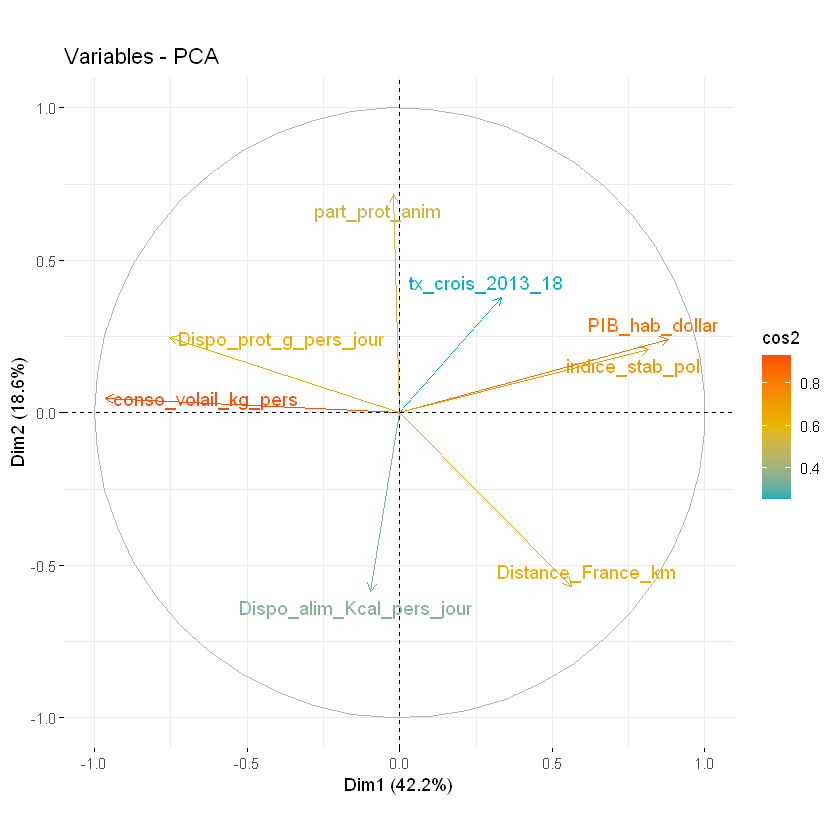

In [95]:
fviz_pca_var(res.pca, col.var="cos2",
            gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
            repel=TRUE
            )

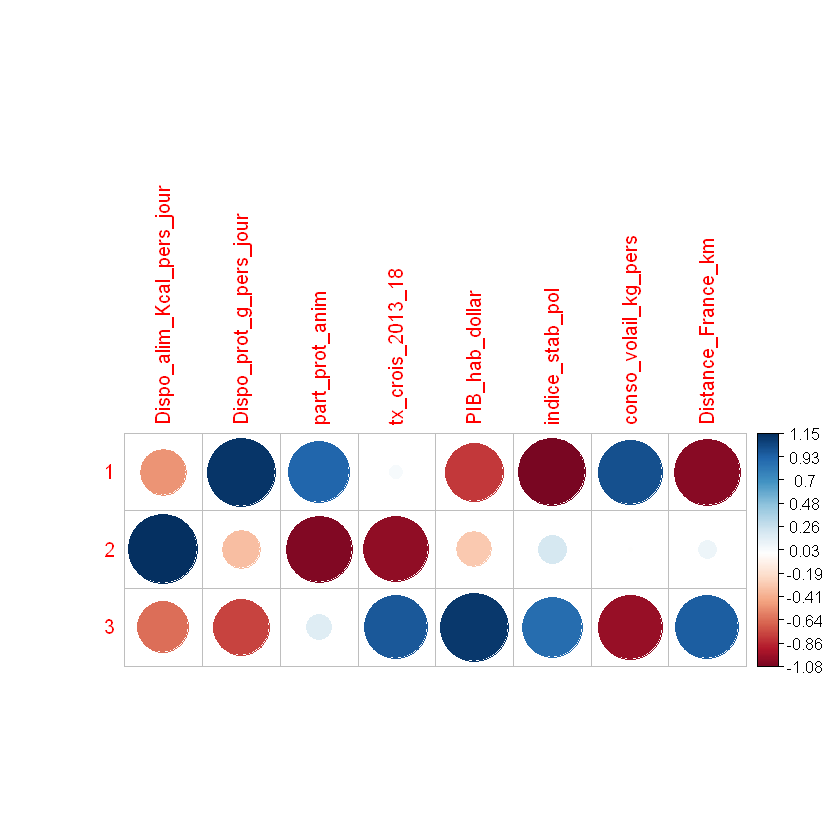

In [96]:
# Heatmap de corrélation
corrplot(second_scaled_data_clust,is.corr=FALSE)

Au regard du tableau de chaleur et du graphique d'aggrégation par couleur, il apparaît que les pays du groupes 3 (Macao, Luxembourg, Suisse et Norvège) se distinguent des autres groupes sur l'ensemble des variables retenues dans notre analyse. Ce sont ces 4 pays que nous allons

## 9. Tests statistiques <a class='anchor' id='test'></a>

### a. Test d'adéquation à la loi normale <a class='anchor' id='test1'></a>

Nous disposons de 8 variables continues. Parmi celles-ci, les trois variables relatives à la disponibilité alimentaire et à la consommation de volailles montrent une certaine proximité pusiqu'elles sont partiellement corrélées, et s'appliquent aux individus sur un rythme quotidien. La part des protéines animales dans l'alimentation est une proportion comprise entre 0 et 100. Le taux de croissance démographique est un pourcentage compris entre -100 et 100. Enfin, l'indice de stabilité politique se fonde sur des valeurs continues de faible amplitude comprises environ entre -5 et 5.

Nous considérons que nos variables suivent des lois de probabilité continue. Nous allons donc étudier l'écart entre la fonction de répartition d'un loi normale (Fn) et la fonction de répartition observée (F0) pour chacune des variables retenues dans notre analyse. Nous allons donc tester chacune des variables comme des variables indépendantes et identiquement distribuées de même loi que X, selon les deux hypothèses suivantes:
H0: F=F0
H1:F≠F0

Nous allons utiliser plusieurs tests de normalité pour des variables de valeur continue: les test de Kolmogorov-Smirnov, de Shapiro-Wilk et le test de Lilliefors.

#### Disponibilité alimentaire journalière par habitant en Kcal 

In [97]:
# Test de Kolmogorov Smirnov
ks.test(data$Dispo_alim_Kcal_pers_jour,"pnorm", mean=mean(data$Dispo_alim_Kcal_pers_jour),sd=sd(data$Dispo_alim_Kcal_pers_jour))


Warning message in ks.test(data$Dispo_alim_Kcal_pers_jour, "pnorm", mean = mean(data$Dispo_alim_Kcal_pers_jour), :
"ties should not be present for the Kolmogorov-Smirnov test"


	One-sample Kolmogorov-Smirnov test

data:  data$Dispo_alim_Kcal_pers_jour
D = 0.075762, p-value = 0.2833
alternative hypothesis: two-sided


In [98]:
# Test de Shapiro-Wilk 
shapiro.test(data$Dispo_alim_Kcal_pers_jour)



	Shapiro-Wilk normality test

data:  data$Dispo_alim_Kcal_pers_jour
W = 0.98505, p-value = 0.06567


In [99]:
# Test de Lilliefors
lillie.test(data$Dispo_alim_Kcal_pers_jour)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  data$Dispo_alim_Kcal_pers_jour
D = 0.075762, p-value = 0.01865


Selon les deux premiers tests, l'hypothèse de normalité ne peut pas être rejetée au niveau de test de 5%. Le test de Lilliefors, plus sensible aux variations de la partie centrale de la distribution, présente un résultat plus critique envers l'hypothèse de normalité.

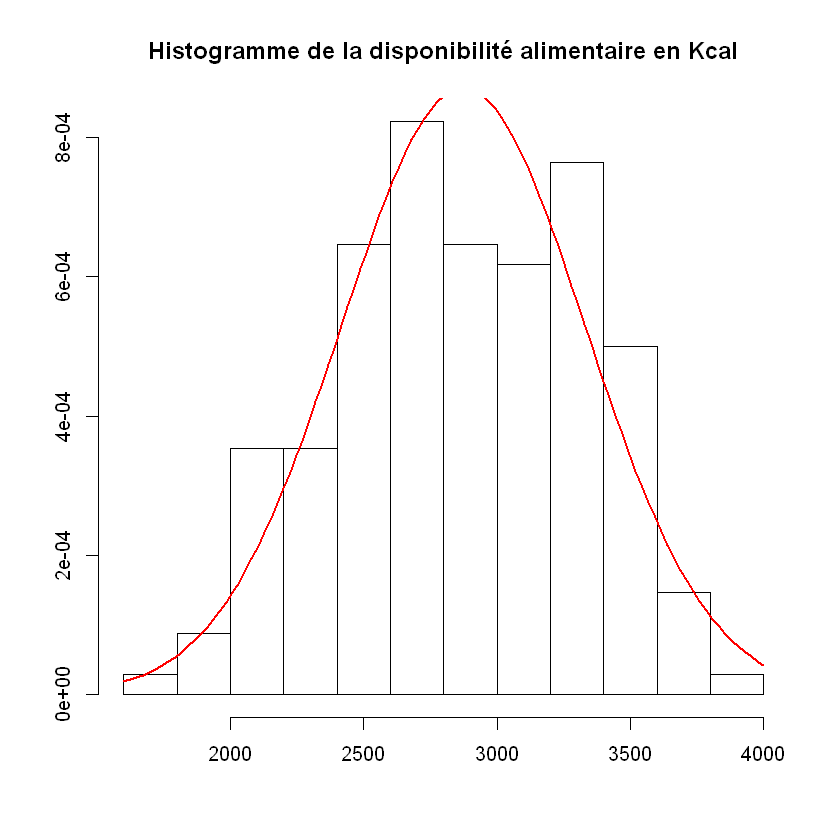

In [100]:
hist(data$Dispo_alim_Kcal_pers_jour,prob=TRUE,xlab="",ylab="",main="Histogramme de la disponibilité alimentaire en Kcal")
curve(dnorm(x,mean=mean(data$Dispo_alim_Kcal_pers_jour),sd=sd(data$Dispo_alim_Kcal_pers_jour)),col="red",lwd=2,add=TRUE,yaxt="n")

#### Disponibilité alimentaire journalière par habitant en protéines

In [101]:
# Test de Kolmogorov Smirnov
ks.test(data$Dispo_prot_g_pers_jour,"pnorm", mean=mean(data$Dispo_prot_g_pers_jour),sd=sd(data$Dispo_prot_g_pers_jour))


Warning message in ks.test(data$Dispo_prot_g_pers_jour, "pnorm", mean = mean(data$Dispo_prot_g_pers_jour), :
"ties should not be present for the Kolmogorov-Smirnov test"


	One-sample Kolmogorov-Smirnov test

data:  data$Dispo_prot_g_pers_jour
D = 0.080461, p-value = 0.221
alternative hypothesis: two-sided


In [102]:
# Test de Shapiro-Wilk 
shapiro.test(data$Dispo_prot_g_pers_jour)


	Shapiro-Wilk normality test

data:  data$Dispo_prot_g_pers_jour
W = 0.98143, p-value = 0.02254


In [103]:
# Test de Lilliefors
lillie.test(data$Dispo_prot_g_pers_jour)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  data$Dispo_prot_g_pers_jour
D = 0.080461, p-value = 0.009213


Le test de Kolmogorov Smirnov semble favorable au test de normalité car sa p-valeur est supérieure à 5%. Selon les tests de Shapiro-Wilk et de Lilliefors en revanche, l'hypothèse de normalité peut être rejetée. Observons comment cela se traduit en confrontant les données sous la forme d'un histogramme avec une courbe de densité normale.

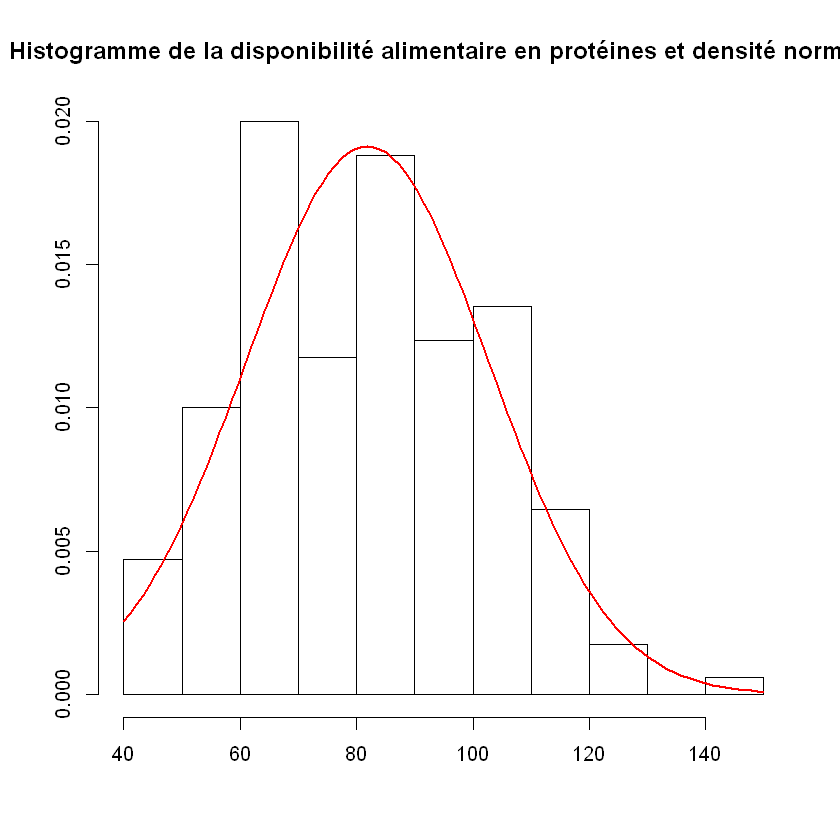

In [104]:
hist(data$Dispo_prot_g_pers_jour,prob=TRUE,xlab="",ylab="",main="Histogramme de la disponibilité alimentaire en protéines et densité normale")
curve(dnorm(x,mean=mean(data$Dispo_prot_g_pers_jour),sd=sd(data$Dispo_prot_g_pers_jour)),col="red",lwd=2,add=TRUE,yaxt="n")

#### Part des protéines animales dans la consommation de protéines

In [105]:
# Test de Kolmogorov Smirnov
ks.test(data$part_prot_anim,"pnorm", mean=mean(data$Dispo_prot_g_pers_jour),sd=sd(data$part_prot_anim))



	One-sample Kolmogorov-Smirnov test

data:  data$part_prot_anim
D = 0.82599, p-value < 2.2e-16
alternative hypothesis: two-sided


In [106]:
# Test de Shapiro-Wilk 
shapiro.test(data$part_prot_anim)


	Shapiro-Wilk normality test

data:  data$part_prot_anim
W = 0.95582, p-value = 3.427e-05


In [107]:
# Test de Lilliefors
lillie.test(data$part_prot_anim)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  data$part_prot_anim
D = 0.090947, p-value = 0.001576


Ici, seul le test de Kolmogorov Smirnov valide l'hypothèse de normalité de la part des protéines animales dans la consommation. Avec une valeur bien inférieure au risque alpha de 5%, les deux autres tests invalident l'hypothèse.

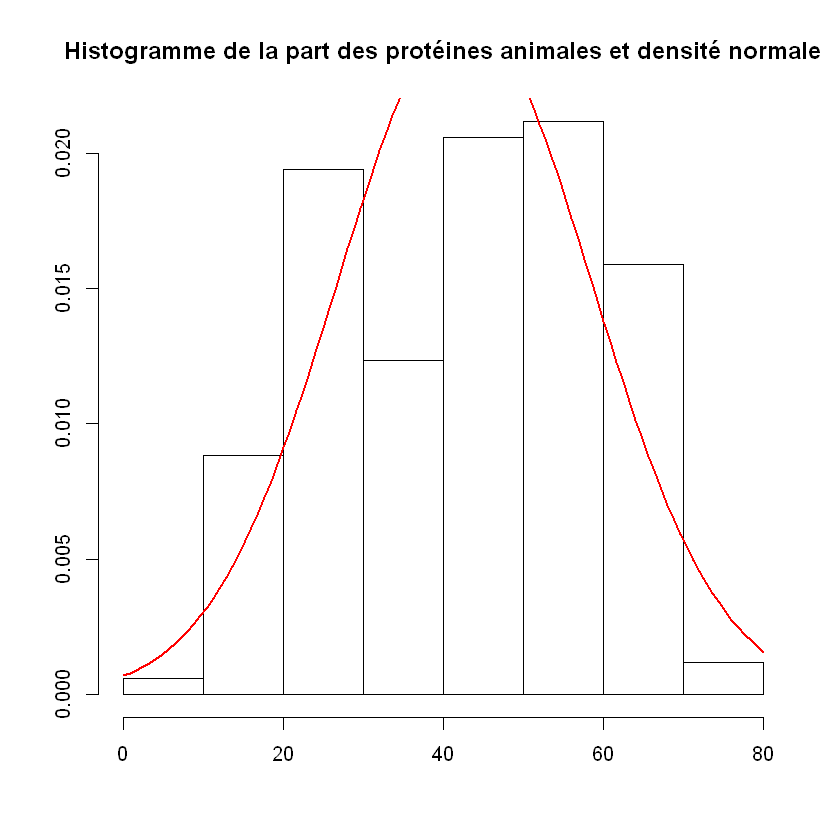

In [108]:
hist(data$part_prot_anim,prob=TRUE,xlab="",ylab="",main="Histogramme de la part des protéines animales et densité normale")
curve(dnorm(x,mean=mean(data$part_prot_anim),sd=sd(data$part_prot_anim)),col="red",lwd=2,add=TRUE,yaxt="n")

#### Taux de croissance démographique entre 2013 et 2018

In [109]:
# Test de Kolmogorov Smirnov
ks.test(data$tx_crois_2013_18,"pnorm", mean=mean(data$tx_crois_2013_18),sd=sd(data$tx_crois_2013_18))


	One-sample Kolmogorov-Smirnov test

data:  data$tx_crois_2013_18
D = 0.071463, p-value = 0.3504
alternative hypothesis: two-sided


In [110]:
# Test de Shapiro-Wilk 
shapiro.test(data$tx_crois_2013_18)


	Shapiro-Wilk normality test

data:  data$tx_crois_2013_18
W = 0.97808, p-value = 0.008597


In [111]:
# Test de Lilliefors
lillie.test(data$tx_crois_2013_18)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  data$tx_crois_2013_18
D = 0.071463, p-value = 0.0339


Les test de Lilliefors et de Shapiro-Wilk rejettent encore une fois l'hypothèse de normalité de la variable.

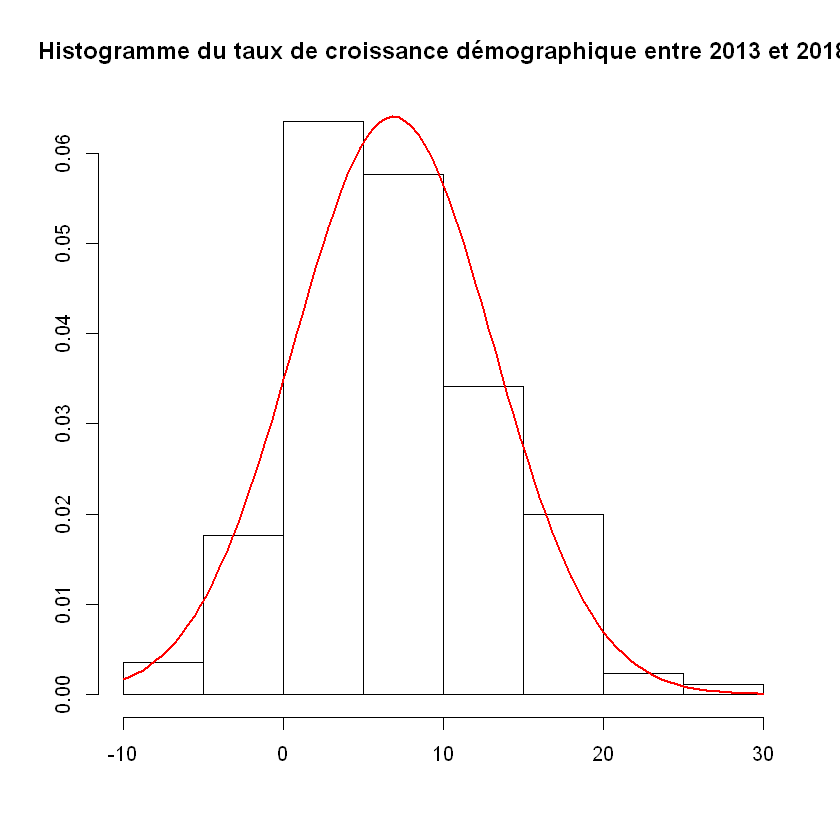

In [112]:
hist(data$tx_crois_2013_18,prob=TRUE,xlab="",ylab="",main="Histogramme du taux de croissance démographique entre 2013 et 2018")
curve(dnorm(x,mean=mean(data$tx_crois_2013_18),sd=sd(data$tx_crois_2013_18)),col="red",lwd=2,add=TRUE,yaxt="n")

#### Croissance du PIB par habitant (en dollars)

In [113]:
# Test de Kolmogorov Smirnov
ks.test(data$PIB_hab_dollar,"pnorm", mean=mean(data$PIB_hab_dollar),sd=sd(data$PIB_hab_dollar))


	One-sample Kolmogorov-Smirnov test

data:  data$PIB_hab_dollar
D = 0.24192, p-value = 4.563e-09
alternative hypothesis: two-sided


In [114]:
# Test de Shapiro-Wilk 
shapiro.test(data$PIB_hab_dollar)


	Shapiro-Wilk normality test

data:  data$PIB_hab_dollar
W = 0.69506, p-value < 2.2e-16


In [115]:
# Test de Lilliefors
lillie.test(data$PIB_hab_dollar)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  data$PIB_hab_dollar
D = 0.24192, p-value < 2.2e-16


De manière assez prévisible, aucun test ne valide l'hypothèse de normalité car la variable un celle d'un pourcentage de croissance dans une économie mondialisée à la croissance faible.

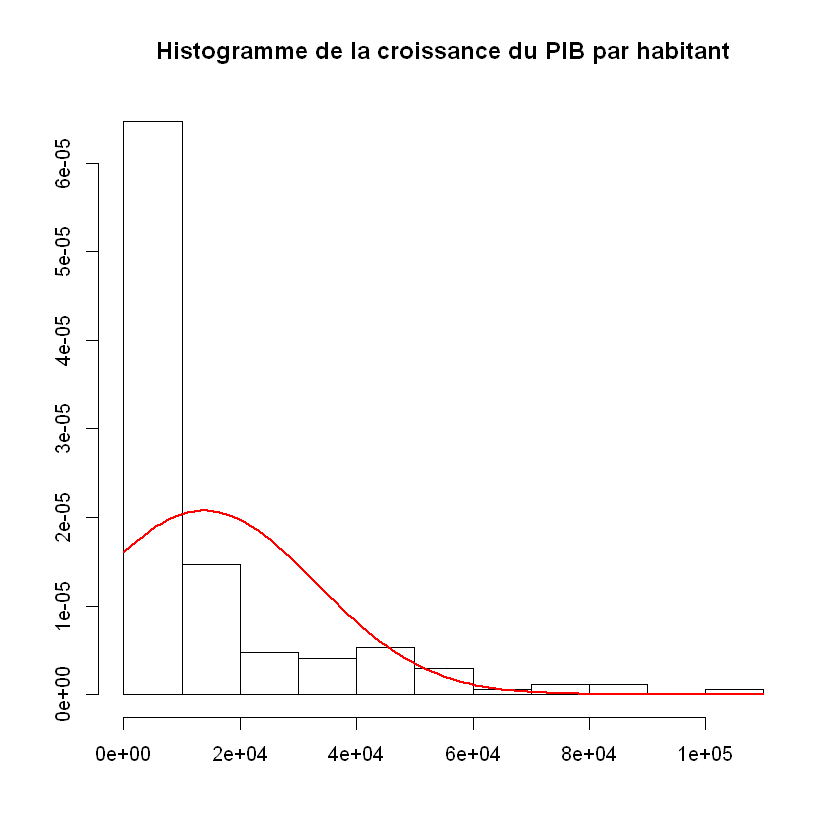

In [116]:
hist(data$PIB_hab_dollar,prob=TRUE,xlab="",ylab="",main="Histogramme de la croissance du PIB par habitant")
curve(dnorm(x,mean=mean(data$PIB_hab_dollar),sd=sd(data$PIB_hab_dollar)),col="red",lwd=2,add=TRUE,yaxt="n")

#### L'indicateur de stabilité politique

In [117]:
# Test de Kolmogorov Smirnov
ks.test(data$indice_stab_pol,"pnorm", mean=mean(data$indice_stab_pol),sd=sd(data$indice_stab_pol))

Warning message in ks.test(data$indice_stab_pol, "pnorm", mean = mean(data$indice_stab_pol), :
"ties should not be present for the Kolmogorov-Smirnov test"


	One-sample Kolmogorov-Smirnov test

data:  data$indice_stab_pol
D = 0.059004, p-value = 0.5948
alternative hypothesis: two-sided


In [118]:
# Test de Shapiro-Wilk 
shapiro.test(data$indice_stab_pol)


	Shapiro-Wilk normality test

data:  data$indice_stab_pol
W = 0.96205, p-value = 0.0001392


In [119]:
# Test de Lilliefors
lillie.test(data$indice_stab_pol)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  data$indice_stab_pol
D = 0.059004, p-value = 0.1575


Ici, les tests de Kolmogorov-Smirnov et de Lilliefors valident l'hypothèse de normalité. Le test de Shapiro-Wilk rejette quant à lui l'hypothèse selon laquelle la variable se conformerait à la loi de normalité.

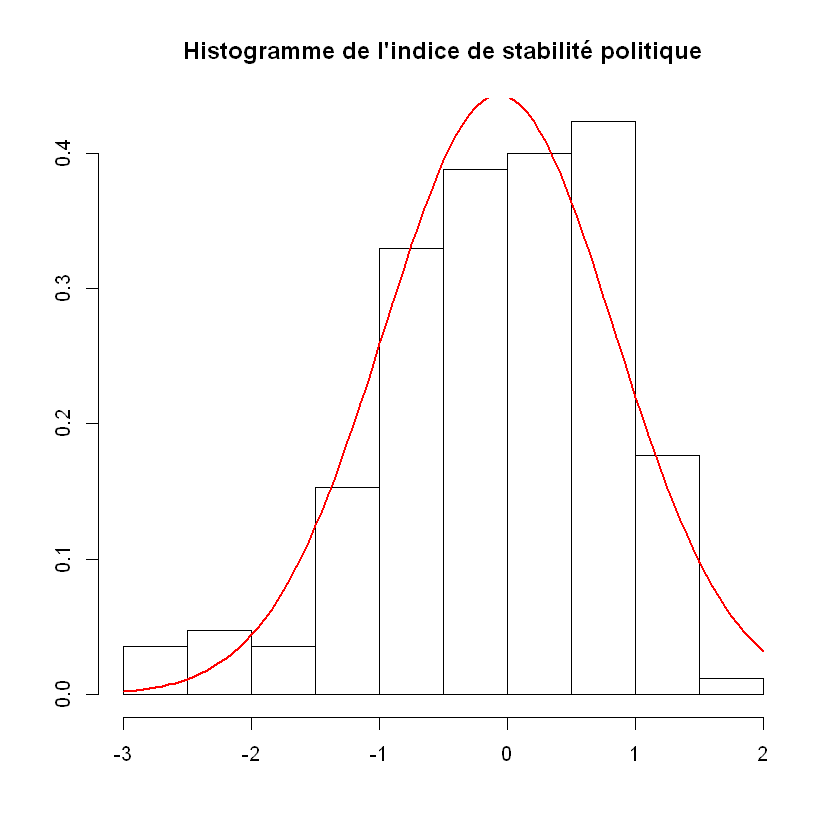

In [120]:
hist(data$indice_stab_pol,prob=TRUE,xlab="",ylab="",main="Histogramme de l'indice de stabilité politique")
curve(dnorm(x,mean=mean(data$indice_stab_pol),sd=sd(data$indice_stab_pol)),col="red",lwd=2,add=TRUE,yaxt="n")

#### La distance à la France (en kilomètres)

In [121]:
# Test de Kolmogorov Smirnov
ks.test(data$Distance_France_km,"pnorm", mean=mean(data$Distance_France_km),sd=sd(data$Distance_France_km))


	One-sample Kolmogorov-Smirnov test

data:  data$Distance_France_km
D = 0.080365, p-value = 0.2222
alternative hypothesis: two-sided


In [122]:
# Test de Shapiro-Wilk 
shapiro.test(data$Distance_France_km)


	Shapiro-Wilk normality test

data:  data$Distance_France_km
W = 0.95089, p-value = 1.206e-05


In [123]:
# Test de Lilliefors
lillie.test(data$Distance_France_km)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  data$Distance_France_km
D = 0.080365, p-value = 0.009351


La variable de distance à la France ne voit que le test de Kolmogorov-Smirnov soutenir son hypothèse de normalité.

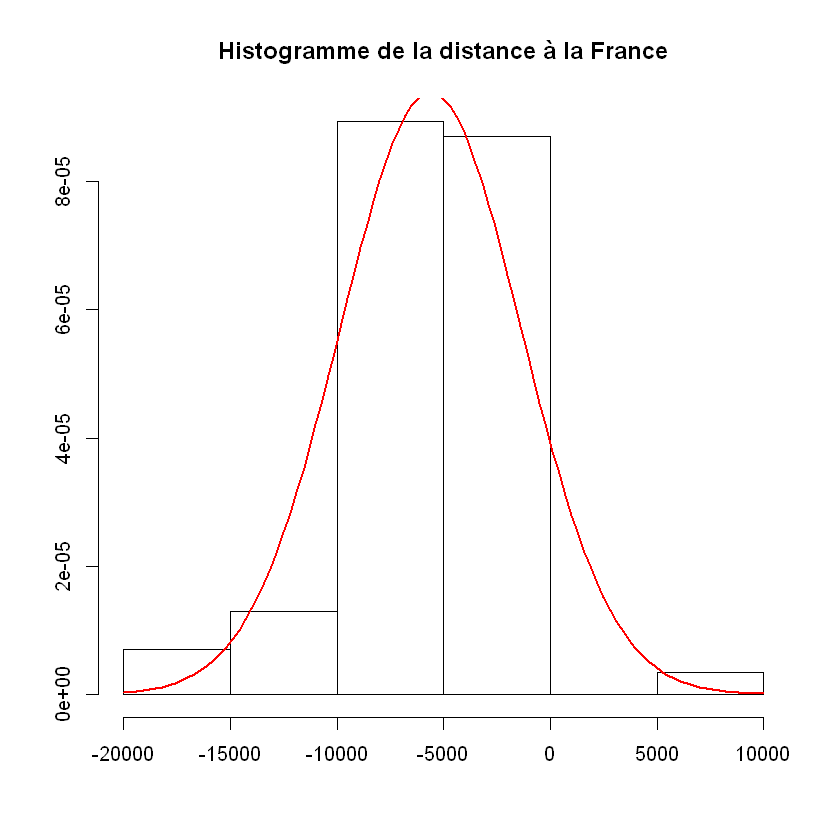

In [124]:
hist(data$Distance_France_km,prob=TRUE,xlab="",ylab="",main="Histogramme de la distance à la France")
curve(dnorm(x,mean=mean(data$Distance_France_km),sd=sd(data$Distance_France_km)),col="red",lwd=2,add=TRUE,yaxt="n")

#### La consommation de volaille par personne (en kg)

In [125]:
# Test de Kolmogorov Smirnov
ks.test(data$conso_volail_kg_pers,"pnorm", mean=mean(data$conso_volail_kg_pers),sd=sd(data$conso_volail_kg_pers))

Warning message in ks.test(data$conso_volail_kg_pers, "pnorm", mean = mean(data$conso_volail_kg_pers), :
"ties should not be present for the Kolmogorov-Smirnov test"


	One-sample Kolmogorov-Smirnov test

data:  data$conso_volail_kg_pers
D = 0.10412, p-value = 0.05014
alternative hypothesis: two-sided


In [126]:
# Test de Shapiro-Wilk 
shapiro.test(data$conso_volail_kg_pers)


	Shapiro-Wilk normality test

data:  data$conso_volail_kg_pers
W = 0.921, p-value = 5.557e-08


In [127]:
# Test de Lilliefors
lillie.test(data$conso_volail_kg_pers)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  data$conso_volail_kg_pers
D = 0.10412, p-value = 0.0001174


Le test de Kolmogorov Smirnov valide de justesse l'hypothèse de normalité de la variable 'consommation de volaille'. Les autres tests rejettent néanmoins cette hypoth

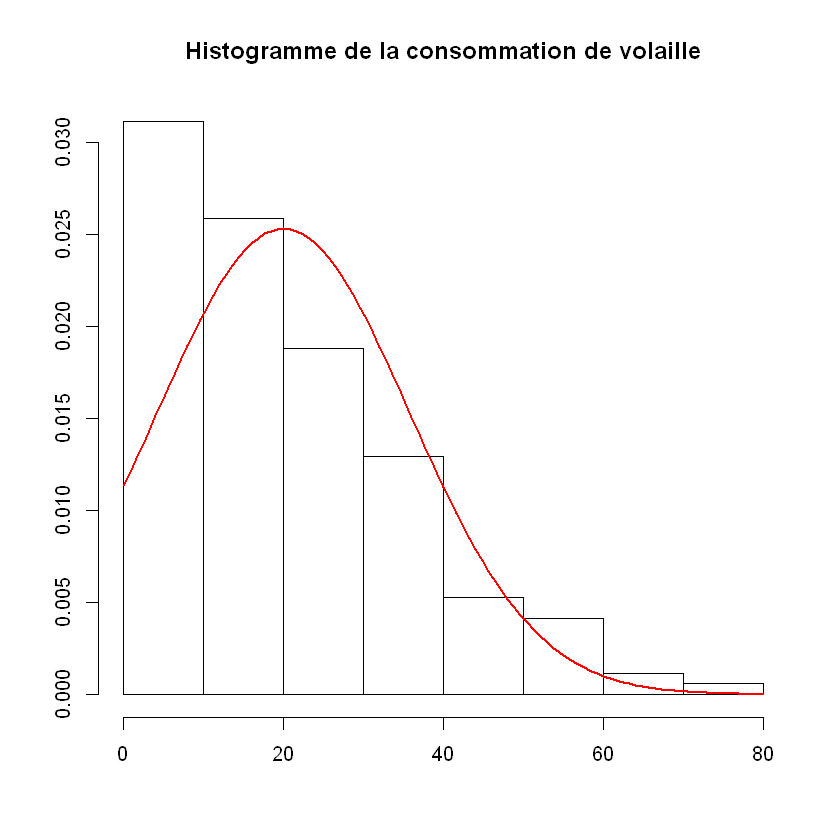

In [128]:
hist(data$conso_volail_kg_pers,prob=TRUE,xlab="",ylab="",main="Histogramme de la consommation de volaille")
curve(dnorm(x,mean=mean(data$conso_volail_kg_pers),sd=sd(data$conso_volail_kg_pers)),col="red",lwd=2,add=TRUE,yaxt="n")

Parmi toutes les variables, la disponibilité alimentaire (en Kcal) est la seule variable dont l'hypothèse de normalité n'est pas rejetée par le test de Shapiro -Wilk. Nous allons donc nous concentrer brièvement sur cette variable pour y tester la normalité de la distribution dans deux clusters sélectionnés.

### b. Tests statistiques des clusters dans la variable 'disponibilité alimentaire(Kcal)' <a class='anchor' id='test2'></a>

#### Test de normalité de chacun des 5 clusters

Groupe 1

In [129]:
# Restriction des données standardisées du 1er cluster
dispo_alim_clust_1 <- data_clust %>% 
    filter(data_clust$clust == 1) %>%
    select(Dispo_alim_Kcal_pers_jour)

In [130]:
# Test de Kolmogorov Smirnov
ks.test(dispo_alim_clust_1$Dispo_alim_Kcal_pers_jour,"pnorm", mean=mean(dispo_alim_clust_1$Dispo_alim_Kcal_pers_jour),sd=sd(dispo_alim_clust_1$Dispo_alim_Kcal_pers_jour))


Warning message in ks.test(dispo_alim_clust_1$Dispo_alim_Kcal_pers_jour, "pnorm", :
"ties should not be present for the Kolmogorov-Smirnov test"


	One-sample Kolmogorov-Smirnov test

data:  dispo_alim_clust_1$Dispo_alim_Kcal_pers_jour
D = 0.11127, p-value = 0.7345
alternative hypothesis: two-sided


In [131]:
# Test de Shapiro-Wilk 
shapiro.test(dispo_alim_clust_1$Dispo_alim_Kcal_pers_jour)


	Shapiro-Wilk normality test

data:  dispo_alim_clust_1$Dispo_alim_Kcal_pers_jour
W = 0.96193, p-value = 0.2193


In [132]:
# Test de Lilliefors
lillie.test(dispo_alim_clust_1$Dispo_alim_Kcal_pers_jour)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  dispo_alim_clust_1$Dispo_alim_Kcal_pers_jour
D = 0.11127, p-value = 0.2758


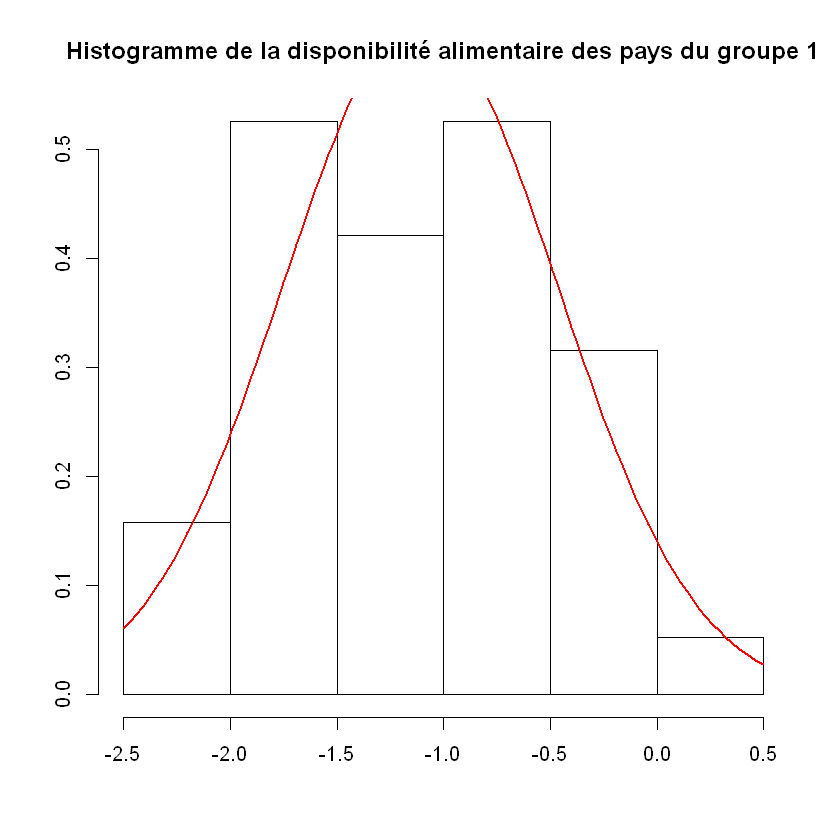

In [133]:
hist(dispo_alim_clust_1$Dispo_alim_Kcal_pers_jour,prob=TRUE,xlab="",ylab="",main="Histogramme de la disponibilité alimentaire des pays du groupe 1")
curve(dnorm(x,mean=mean(dispo_alim_clust_1$Dispo_alim_Kcal_pers_jour),sd=sd(dispo_alim_clust_1$Dispo_alim_Kcal_pers_jour)),col="red",lwd=2,add=TRUE,yaxt="n")

Groupe 2

In [134]:
# Restriction des données standardisées du 2e cluster
dispo_alim_clust_2 <- data_clust %>% 
    filter(data_clust$clust == 2) %>%
    select(Dispo_alim_Kcal_pers_jour)

In [135]:
# Test de Kolmogorov Smirnov
ks.test(dispo_alim_clust_2$Dispo_alim_Kcal_pers_jour,"pnorm", mean=mean(dispo_alim_clust_2$Dispo_alim_Kcal_pers_jour),sd=sd(dispo_alim_clust_2$Dispo_alim_Kcal_pers_jour))


Warning message in ks.test(dispo_alim_clust_2$Dispo_alim_Kcal_pers_jour, "pnorm", :
"ties should not be present for the Kolmogorov-Smirnov test"


	One-sample Kolmogorov-Smirnov test

data:  dispo_alim_clust_2$Dispo_alim_Kcal_pers_jour
D = 0.093839, p-value = 0.8127
alternative hypothesis: two-sided


In [136]:
# Test de Shapiro-Wilk 
shapiro.test(dispo_alim_clust_2$Dispo_alim_Kcal_pers_jour)


	Shapiro-Wilk normality test

data:  dispo_alim_clust_2$Dispo_alim_Kcal_pers_jour
W = 0.98172, p-value = 0.677


In [137]:
# Test de Lilliefors
lillie.test(dispo_alim_clust_2$Dispo_alim_Kcal_pers_jour)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  dispo_alim_clust_2$Dispo_alim_Kcal_pers_jour
D = 0.093839, p-value = 0.3939


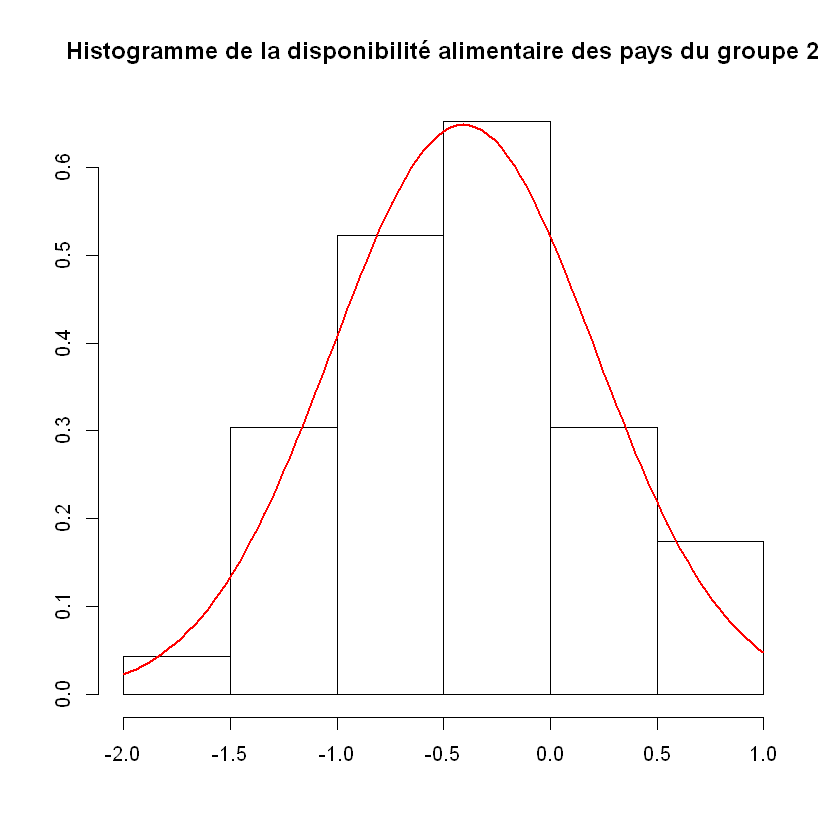

In [138]:
hist(dispo_alim_clust_2$Dispo_alim_Kcal_pers_jour,prob=TRUE,xlab="",ylab="",main="Histogramme de la disponibilité alimentaire des pays du groupe 2")
curve(dnorm(x,mean=mean(dispo_alim_clust_2$Dispo_alim_Kcal_pers_jour),sd=sd(dispo_alim_clust_2$Dispo_alim_Kcal_pers_jour)),col="red",lwd=2,add=TRUE,yaxt="n")

Groupe 3

In [139]:
# Restriction des données standardisées du 3e cluster
dispo_alim_clust_3 <- data_clust %>% 
    filter(data_clust$clust == 3) %>%
    select(Dispo_alim_Kcal_pers_jour)

In [140]:
# Test de Kolmogorov Smirnov
ks.test(dispo_alim_clust_3$Dispo_alim_Kcal_pers_jour,"pnorm", mean=mean(dispo_alim_clust_3$Dispo_alim_Kcal_pers_jour),sd=sd(dispo_alim_clust_3$Dispo_alim_Kcal_pers_jour))


Warning message in ks.test(dispo_alim_clust_3$Dispo_alim_Kcal_pers_jour, "pnorm", :
"ties should not be present for the Kolmogorov-Smirnov test"


	One-sample Kolmogorov-Smirnov test

data:  dispo_alim_clust_3$Dispo_alim_Kcal_pers_jour
D = 0.071507, p-value = 0.9959
alternative hypothesis: two-sided


In [141]:
# Test de Shapiro-Wilk 
shapiro.test(dispo_alim_clust_3$Dispo_alim_Kcal_pers_jour)


	Shapiro-Wilk normality test

data:  dispo_alim_clust_3$Dispo_alim_Kcal_pers_jour
W = 0.98112, p-value = 0.8196


In [142]:
# Test de Lilliefors
lillie.test(dispo_alim_clust_3$Dispo_alim_Kcal_pers_jour)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  dispo_alim_clust_3$Dispo_alim_Kcal_pers_jour
D = 0.071507, p-value = 0.9384


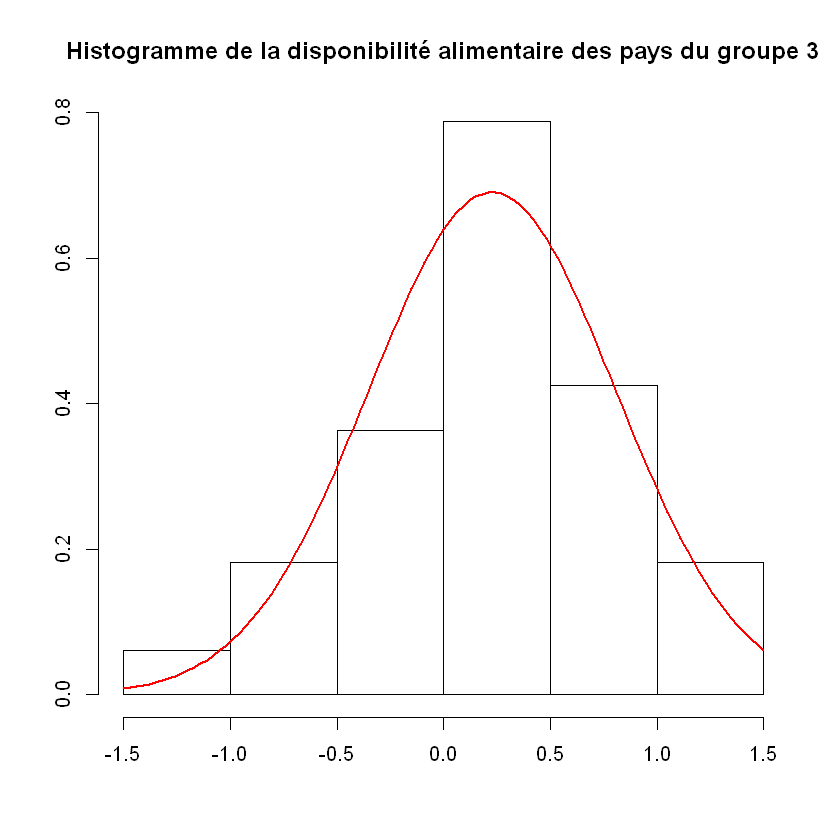

In [143]:
hist(dispo_alim_clust_3$Dispo_alim_Kcal_pers_jour,prob=TRUE,xlab="",ylab="",main="Histogramme de la disponibilité alimentaire des pays du groupe 3")
curve(dnorm(x,mean=mean(dispo_alim_clust_3$Dispo_alim_Kcal_pers_jour),sd=sd(dispo_alim_clust_3$Dispo_alim_Kcal_pers_jour)),col="red",lwd=2,add=TRUE,yaxt="n")

Groupe 4

In [144]:
# Restriction des données standardisées du 4e cluster
dispo_alim_clust_4 <- data_clust %>% 
    filter(data_clust$clust == 4) %>%
    select(Dispo_alim_Kcal_pers_jour)

In [145]:
# Test de Kolmogorov Smirnov
ks.test(dispo_alim_clust_4$Dispo_alim_Kcal_pers_jour,"pnorm", mean=mean(dispo_alim_clust_4$Dispo_alim_Kcal_pers_jour),sd=sd(dispo_alim_clust_4$Dispo_alim_Kcal_pers_jour))



	One-sample Kolmogorov-Smirnov test

data:  dispo_alim_clust_4$Dispo_alim_Kcal_pers_jour
D = 0.10848, p-value = 0.807
alternative hypothesis: two-sided


In [146]:
# Test de Shapiro-Wilk 
shapiro.test(dispo_alim_clust_4$Dispo_alim_Kcal_pers_jour)


	Shapiro-Wilk normality test

data:  dispo_alim_clust_4$Dispo_alim_Kcal_pers_jour
W = 0.96102, p-value = 0.2929


In [147]:
# Test de Lilliefors
lillie.test(dispo_alim_clust_4$Dispo_alim_Kcal_pers_jour)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  dispo_alim_clust_4$Dispo_alim_Kcal_pers_jour
D = 0.10848, p-value = 0.4403


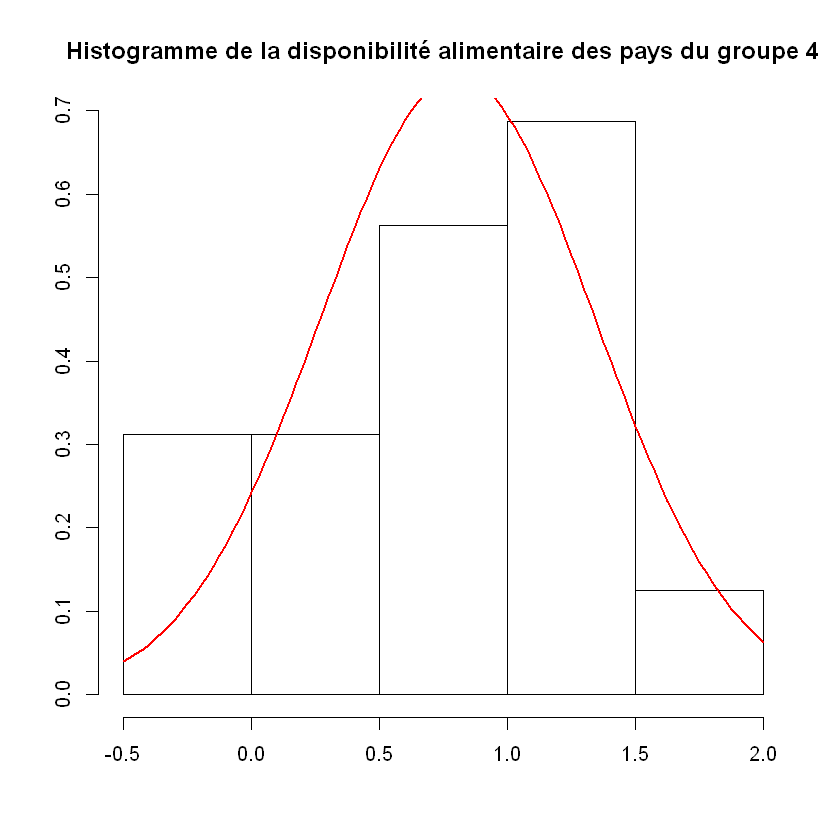

In [148]:
hist(dispo_alim_clust_4$Dispo_alim_Kcal_pers_jour,prob=TRUE,xlab="",ylab="",main="Histogramme de la disponibilité alimentaire des pays du groupe 4")
curve(dnorm(x,mean=mean(dispo_alim_clust_4$Dispo_alim_Kcal_pers_jour),sd=sd(dispo_alim_clust_4$Dispo_alim_Kcal_pers_jour)),col="red",lwd=2,add=TRUE,yaxt="n")

Groupe 5

In [149]:
# Restriction des données standardisées du 5e cluster
dispo_alim_clust_5 <- data_clust %>% 
    filter(data_clust$clust == 5) %>%
    select(Dispo_alim_Kcal_pers_jour)

In [150]:
# Test de Kolmogorov Smirnov
ks.test(dispo_alim_clust_5$Dispo_alim_Kcal_pers_jour,"pnorm", mean=mean(dispo_alim_clust_5$Dispo_alim_Kcal_pers_jour),sd=sd(dispo_alim_clust_5$Dispo_alim_Kcal_pers_jour))



	One-sample Kolmogorov-Smirnov test

data:  dispo_alim_clust_5$Dispo_alim_Kcal_pers_jour
D = 0.1421, p-value = 0.7385
alternative hypothesis: two-sided


In [151]:
# Test de Shapiro-Wilk 
shapiro.test(dispo_alim_clust_5$Dispo_alim_Kcal_pers_jour)


	Shapiro-Wilk normality test

data:  dispo_alim_clust_5$Dispo_alim_Kcal_pers_jour
W = 0.94113, p-value = 0.2294


In [152]:
# Test de Lilliefors
lillie.test(dispo_alim_clust_5$Dispo_alim_Kcal_pers_jour)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  dispo_alim_clust_5$Dispo_alim_Kcal_pers_jour
D = 0.1421, p-value = 0.3264


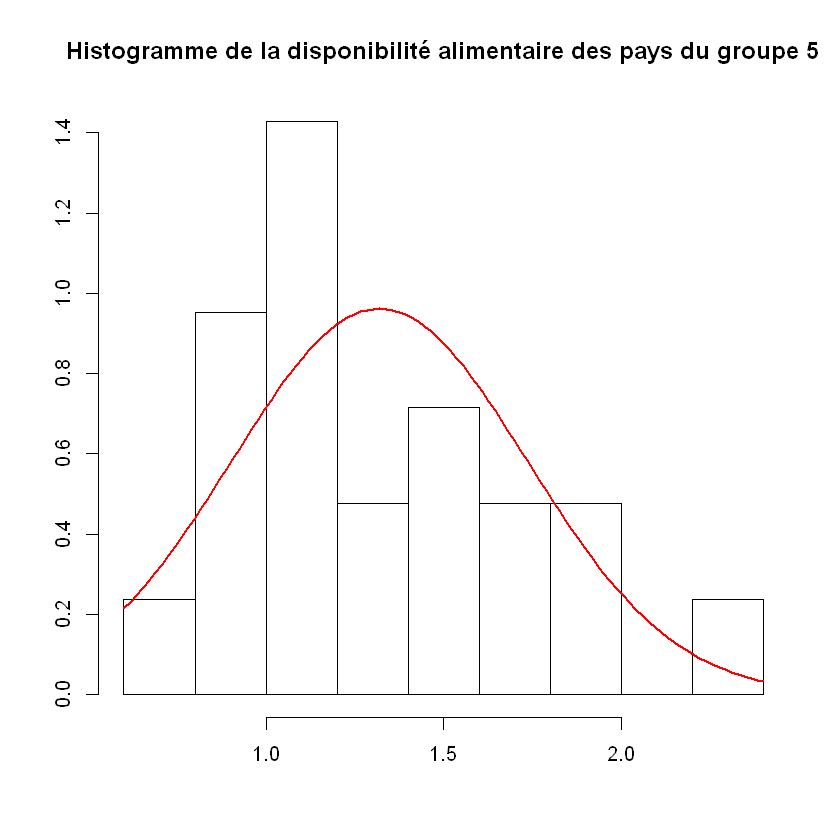

In [153]:
hist(dispo_alim_clust_5$Dispo_alim_Kcal_pers_jour,prob=TRUE,xlab="",ylab="",main="Histogramme de la disponibilité alimentaire des pays du groupe 5")
curve(dnorm(x,mean=mean(dispo_alim_clust_5$Dispo_alim_Kcal_pers_jour),sd=sd(dispo_alim_clust_5$Dispo_alim_Kcal_pers_jour)),col="red",lwd=2,add=TRUE,yaxt="n")

De ces différents tests d'adéquation, nous pouvons conclure que les pays des groupes 2 et 3 semblent mieux remplir les conditions de normalité dans la variable "disponibilité alimentaire (Kcal)". 
Ce sont ces deux groupes que nous allons plus précisément comparer dans la partie suivante.

#### Tests de comparaison

Préparation des dataframes

In [154]:
# Restriction et préparation du tableau pour la jointure
data_clust_2et3 <- data_clust %>% filter(clust==2 | clust==3) %>%
    select(clust)
head(data_clust_2et3)

,clust
Argentine,3
Antigua-et-Barbuda,3
Australie,3
Azerbaïdjan,2
Bahamas,3
Belize,2


In [155]:
# Jointure avec le dataframe principal
data_clust_2et3 <- merge(data_clust_2et3, data, by.x = 0, by.y = 0, all.x = TRUE, all.y = TRUE)

In [156]:
# Restriction aux pays des clusters 5
data_clust_2et3 <- data_clust_2et3[complete.cases(data_clust_2et3),]
head(data_clust_2et3)

,Row.names,clust,Code.zone,Dispo_alim_Kcal_pers_jour,Dispo_prot_g_pers_jour,part_prot_anim,tx_crois_2013_18,PIB_hab_dollar,indice_stab_pol,conso_volail_kg_pers,Distance_France_km
2,Afrique du Sud,3,ZAF,2899,84.37,42.70982,7.646894,5674.963,-0.28,35.69,-9306.639
4,Algérie,2,DZA,3322,91.83,26.93020,10.719090,4188.398,-0.79,6.38,-1345.460
7,Antigua-et-Barbuda,3,ATG,2445,80.19,64.52176,5.212203,15157.863,0.73,54.10,-6711.071
8,Arabie saoudite,3,SAU,3307,86.94,37.65816,12.147910,20113.419,-0.52,43.36,-4686.618
9,Argentine,3,ARG,3307,106.77,64.67172,5.131099,14143.028,0.02,42.24,-11025.348
11,Australie,3,AUS,3391,105.94,66.74219,7.066201,54095.501,0.98,47.65,-16957.684


In [157]:
# Séparation du dataframe selon l'appartenance des pays aux clusters 2 et 3
data_clust_2 <- data_clust_2et3 %>%
    filter(clust==2)

data_clust_3 <- data_clust_2et3 %>%
    filter(clust==3)

In [158]:
# Suppresion de la colonne "clust"
data_clust_2et3$clust <- NULL

In [159]:
# Restriction
df_clust2 <- data_clust_2 %>% 
    select(Row.names, Dispo_alim_Kcal_pers_jour)

df_clust3 <- data_clust_3 %>% 
    select(Row.names, Dispo_alim_Kcal_pers_jour)

In [160]:
# Mise en index de la colonne 'Row.names'
rownames(df_clust2) <- df_clust2$Row.names
df_clust2$Row.names <- NULL


rownames(df_clust3) <- df_clust3$Row.names
df_clust3$Row.names <- NULL


Test d'égalité des variances des pays des groupes 2 et 3 dans la variable 'disponibilité alimentaire (Kcal)':

In [161]:
var.test(df_clust2$Dispo_alim_Kcal_pers_jour, df_clust3$Dispo_alim_Kcal_pers_jour)


	F test to compare two variances

data:  df_clust2$Dispo_alim_Kcal_pers_jour and df_clust3$Dispo_alim_Kcal_pers_jour
F = 1.134, num df = 45, denom df = 32, p-value = 0.7174
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.5807996 2.1355316
sample estimates:
ratio of variances 
          1.133969 


La p-valeur s'élève à environ 0.72. Nous ne pouvons donc rejeter l'égalité des variances au niveau de test de 5%.

Test d'égalité des moyennes des pays des groupes 2 et 3 dans la variable 'disponibilité alimentaire (Kcal)':

In [162]:
t.test(df_clust2$Dispo_alim_Kcal_pers_jour, df_clust3$Dispo_alim_Kcal_pers_jour, var.equal=TRUE)


	Two Sample t-test

data:  df_clust2$Dispo_alim_Kcal_pers_jour and df_clust3$Dispo_alim_Kcal_pers_jour
t = -4.63, df = 77, p-value = 1.458e-05
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -415.4820 -165.5812
sample estimates:
mean of x mean of y 
 2686.196  2976.727 


On obtient ici une p-valeur égale à environ 1.46 x 10e5. L'hypothèse d'égalité des moyennes dans la variable 'disponibilité alimentaire (Kcal)' est donc largement rejetée à un niveau de test de 5%.